# Importing data and checking the values overall

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from scipy.stats import chi2_contingency
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb



# df=pd.read_csv('train.csv')

import warnings
warnings.filterwarnings("ignore")

Importing and concatting both dataframes

In [2]:
# Setting data paths
train_data_path = "./data/train.csv"
test_data_path = "./data/test.csv"

# Reading CSV files
df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

# Creating column to differentiate df_test and df_train
df_train['is_train_data'] = 1
df_test['is_train_data'] = 0

# Merging dataframes
df = pd.concat([df_train, df_test], axis=0).sort_values("id").reset_index()

In [3]:

# Set display option to avoid scientific notation and limit decimals
pd.set_option('display.float_format', lambda x: '{:.1f}'.format(x) if x % 1 else '{:.0f}'.format(x))

def calculate_column_statistics_for_numeric_variables(df):
    # Filter columns with numeric (int or float) data types
    numeric_columns = df.select_dtypes(include=['int', 'float']).columns

    # Get all column names
    all_columns = df.columns
    total_columns = len(all_columns)

    num_numeric_columns = len(numeric_columns)

    # Find columns with categorical values
    categorical_columns = [col for col in all_columns if df[col].dtype == 'object']

    print(f"Total number of columns: {total_columns}")
    print(f"Number of numeric columns (int or float): {num_numeric_columns}")

    # Create a dictionary to store statistics
    stats_dict = {
        'Variable': numeric_columns,
        'Mean': [],
        'Mode': [],
        'Median': [],
        'Standard Deviation': [],
        'Minimum': [],
        'Maximum': [],
        'Count': [],
        'IQR': [],
        'Skewness': [],
        'Range': []
    }

    for column in numeric_columns:
        mean = df[column].mean()
        mode = statistics.mode(df[column].dropna())  # Handle potential multiple modes
        median = df[column].median()
        std_dev = df[column].std()
        min_val = df[column].min()
        max_val = df[column].max()
        count = df[column].count()
        iqr = np.percentile(df[column].dropna(), 75) - np.percentile(df[column].dropna(), 25)
        skew = df[column].skew()
        column_range = max_val - min_val

        stats_dict['Mean'].append(mean)
        stats_dict['Mode'].append(mode)
        stats_dict['Median'].append(median)
        stats_dict['Standard Deviation'].append(std_dev)
        stats_dict['Minimum'].append(min_val)
        stats_dict['Maximum'].append(max_val)
        stats_dict['Count'].append(count)
        stats_dict['IQR'].append(iqr)
        stats_dict['Skewness'].append(skew)
        stats_dict['Range'].append(column_range)

    # Create a DataFrame from the dictionary
    stats_df = pd.DataFrame(stats_dict)

    return stats_df


calculate_column_statistics_for_numeric_variables(df)

Total number of columns: 72
Number of numeric columns (int or float): 58


,Variable,Mean,Mode,Median,Standard Deviation,Minimum,Maximum,Count,IQR,Skewness,Range
0,index,3140.3,253,3063.5,2101.5,0,6894,7662,3830.5,0.1,6894
1,id,223616.3,41,228152.5,26710.5,41,264481,7662,34871.2,-1.5,264440
2,overall,68.8,67,68,6.0,48,93,7662,7,0.4,45
3,potential,72.0,72,72,6.1,53,95,7662,8,0.3,42
4,value_eur,4331452.9,1200000,1400000,10450193.9,25000,194000000,7657,2275000,6.4,193975000
5,wage_eur,12030.3,2000,4000,24385.9,500,350000,7662,10000,5.8,349500
6,height_cm,181.5,180,182,6.9,156,203,7662,9,-0.1,47
7,weight_kg,75.6,70,75,7.0,53,103,7662,10,0.2,50
8,league_level,1.4,1,1,0.8,1,5,7662,0,2.2,4
9,club_jersey_number,16.5,10,13,15.5,1,99,7662,16,2.6,98


In [4]:
#I want to create a function that creates a dataframe that gives me the categorical variables, the number of unique values, and the top 5 most frequent values. I want to be able to use this function on any dataframe that I have. I have tried the following code but it does not work. I am not sure how to fix it. I am new to python and pandas so any help would be appreciated. Thank you!

def calculate_column_statistics_for_categorical_variables(df):
    # Filter columns with categorical data types
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Get all column names
    all_columns = df.columns
    total_columns = len(all_columns)

    num_categorical_columns = len(categorical_columns)

    # Find columns with numeric values
    numeric_columns = [col for col in all_columns if df[col].dtype == 'int' or df[col].dtype == 'float']

    print(f"Total number of columns: {total_columns}")
    print(f"Number of categorical columns: {num_categorical_columns}")

    # Set the max_colwidth option to control the width of the displayed column
    pd.set_option('max_colwidth', 100)  # Adjust the width as needed

    # Create a dictionary to store statistics
    stats_dict = {
        'Variable': categorical_columns,
        'Number of Unique Values': [],
        'Top 5 Most Frequent Values': []
    }

    for column in categorical_columns:
        num_unique_values = df[column].nunique()
        top_5_frequent_values = df[column].value_counts().index[:5].tolist()  # Get the top 5 values as a list

        stats_dict['Number of Unique Values'].append(num_unique_values)
        stats_dict['Top 5 Most Frequent Values'].append(top_5_frequent_values)

    # Create a DataFrame from the dictionary
    stats_df = pd.DataFrame(stats_dict)

    # Sort the DataFrame downward by the number of unique values
    stats_df = stats_df.sort_values(by='Number of Unique Values', ascending=False)
    stats_df = stats_df.reset_index(drop=True)

    return stats_df

calculate_column_statistics_for_categorical_variables(df)

Total number of columns: 72
Number of categorical columns: 14


,Variable,Number of Unique Values,Top 5 Most Frequent Values
0,short_name,7418,"[J. Rodríguez, J. Brown, M. Camara, L. Rodríguez, Danilo]"
1,birthday_date,4214,"[1992-02-29, 1996-02-29, 2000-02-29, 1988-02-29, 1991-01-08]"
2,club_joined,1331,"[2021-07-01, 2019-07-01, 2018-07-01, 2017-07-01, 2020-07-01]"
3,player_traits,825,"[Speed Dribbler (AI), Power Header, Dives Into Tackles (AI), Long Passer (AI), Long Shot Taker (..."
4,club_name,701,"[Vissel Kobe, Philadelphia Union, Sanfrecce Hiroshima, Seattle Sounders FC, Bengaluru FC]"
5,club_loaned_from,207,"[Racing Club, Manchester United, Watford, Wolverhampton Wanderers, Chelsea]"
6,nationality_name,144,"[England, Brazil, Germany, Spain, Argentina]"
7,player_tags,64,"[#Strength, #Engine, #Acrobat, #Speedster, #Aerial Threat, #Strength]"
8,league_name,55,"[USA Major League Soccer, Argentina Primera División, English League Championship, English Leagu..."
9,position,24,"[LCB, RCB, GK, RB, LB]"


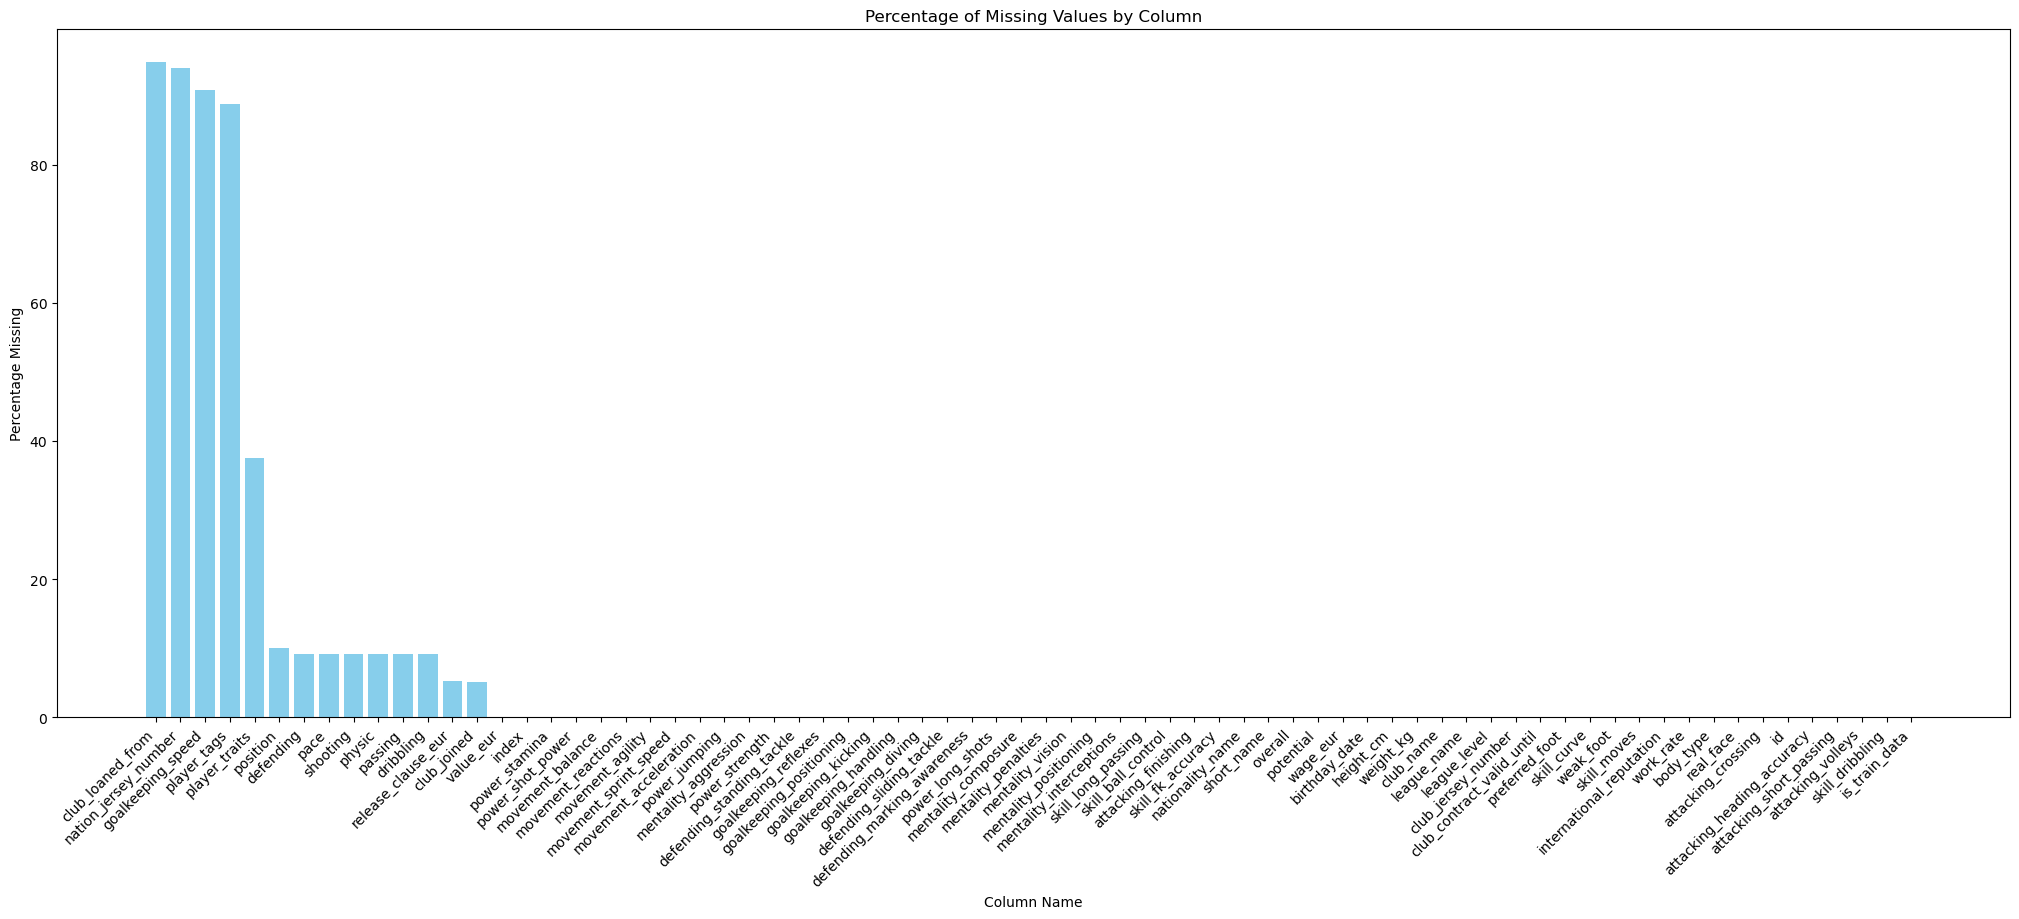


Columns with Missing Values (Descending Order):
club_loaned_from: 94.83% (Categorical)
nation_jersey_number: 93.94% (Numerical)
goalkeeping_speed: 90.85% (Numerical)
player_tags: 88.83% (Categorical)
player_traits: 37.51% (Categorical)
position: 10.01% (Categorical)
defending: 9.15% (Numerical)
pace: 9.15% (Numerical)
shooting: 9.15% (Numerical)
physic: 9.15% (Numerical)
passing: 9.15% (Numerical)
dribbling: 9.15% (Numerical)
release_clause_eur: 5.23% (Numerical)
club_joined: 5.17% (Categorical)
value_eur: 0.07% (Numerical)


In [5]:
def calculate_missing_info_print_only(df):
    # Calculate the percentage of missing values in each column
    missing_percentages_df = (df.isnull().mean() * 100).round(2).reset_index()
    missing_percentages_df.columns = ['Column Name', 'Percentage Missing']

    # Sort the DataFrame by 'Percentage Missing' in descending order
    missing_percentages_df = missing_percentages_df.sort_values(by='Percentage Missing', ascending=False)

    # Classify columns as numerical or categorical
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object', 'bool']).columns.tolist()
    missing_percentages_df['Column Type'] = missing_percentages_df['Column Name'].apply(
        lambda x: 'Numerical' if x in numerical_columns else 'Categorical'
    )

    # Display a bar chart of missing values with increased space between bars
    plt.figure(figsize=(20, 9))
    plt.bar(missing_percentages_df['Column Name'], missing_percentages_df['Percentage Missing'], color='skyblue')
    plt.xlabel('Column Name')
    plt.ylabel('Percentage Missing')
    plt.title('Percentage of Missing Values by Column')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout(pad=0.0001)  # Adjust the padding between bars
    plt.show()

    # Print column names, missing percentages, and column types for columns with missing values higher than 0%
    print("\nColumns with Missing Values (Descending Order):")
    for index, row in missing_percentages_df.iterrows():
        if row['Percentage Missing'] > 0:
            print(f"{row['Column Name']}: {row['Percentage Missing']}% ({row['Column Type']})")

# Example usage with the existing DataFrame 'df'
calculate_missing_info_print_only(df)



Dealing with missing values.

Taking a looking at missing values, club_loaned_from, nation_jersey_number, club_joined are not relevant in terms of positioning. 

Observing the numerical values, goalkeeping_speed, defending, pace, shooting, passing, dribling, physic, it does not also make sense to fill them in any way, as they are caractheristics from the players themselves and there is a nice relation between them.

If you look at goalkepping_speed, you see that it is 90.85%. The other missing values are 9.15%, meaning that probably we have here a relation that the goalkeeping_speed misses in players which are not goalkeeps and the other ones miss in the ones that are goalkeepers.

Player_tags and player_traits might be useful. And we need to think about how to treat it.

Release Clause and value err may be collinear as they indicate pretty much the same information. Although value_eur is a variable that probably needs treatment.



# Dealing with missing values

Let's take a look first on goal_keeping speed to understand what is going on there.

We need to check two things: players with GoalKeeping speed are Goalkeepers and if there any goalkeepers without goalkeeping speed.

Our results says that the previous hyphothesis is confirmed. As a result, and to reduce the number of columns, we will create a Dummy-Variable for GK

In [6]:
# Filter the DataFrame for players with non-null 'goalkeeping_speed' values for the train data
players_with_gk_speed = df[(df['goalkeeping_speed'].notnull()) & (df['is_train_data'] == 1) ]

# Extracting the positions of these players
positions_of_players_with_gk_speed = players_with_gk_speed['position'].unique()

print(positions_of_players_with_gk_speed)

# Check for goalkeepers without 'goalkeeping_speed' values
gk_without_gk_speed = df[(df['position'] == 'GK') & (df['goalkeeping_speed'].isnull())]

gk_without_gk_speed_count = gk_without_gk_speed.shape[0]
print(gk_without_gk_speed_count)



['GK']
0


In [7]:
# Create a new column 'GK_Dummy' 
df['GK_Dummy'] =  pd.notna(df['goalkeeping_speed']).astype(int)

# drop columns for goal_keeping to reduce number of columns
columns_to_drop = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']	

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

Idea: Since we already know, that all players where 'GK_Dummy' = 1, maybe exclude these rows from further data analysis and the model and just impute the predictions manually

In [8]:
df_only_goalkeepers = df[df['GK_Dummy'] == 1]
df_only_goalkeepers

,index,id,short_name,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,...,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,position,is_train_data,GK_Dummy
1,3019,1179,G. Buffon,80,80,2300000,18000,1978-01-28,192,92,...,12,50,22,70,13,11,11,GK,1,1
2,3804,2147,M. Stekelenburg,76,76,825000,8000,1982-09-22,197,92,...,12,40,23,59,9,15,14,GK,1,1
5,3402,19541,G. Morris,64,64,60000,2000,1983-12-20,183,70,...,14,41,29,56,13,22,24,GK,1,1
9,253,24630,Pepe Reina,78,78,1600000,27000,1982-08-31,188,92,...,13,65,24,64,20,22,24,NaN,0,1
13,5686,49000,A. McGregor,77,77,1200000,23000,1982-01-31,183,74,...,13,61,23,68,15,13,15,GK,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7591,711,263023,N. Sauter,56,69,300000,500,2003-04-06,190,80,...,9,26,14,30,8,13,12,NaN,0,1
7594,4769,263032,V. Kovacević,68,75,2100000,2000,1998-04-11,192,81,...,4,55,11,56,8,13,12,GK,1,1
7599,416,263063,J. Trafford,59,77,500000,500,2002-10-10,191,78,...,7,22,16,26,5,13,13,GK,1,1
7614,1004,263232,Luiz Felipe,66,70,975000,1000,1997-04-24,198,90,...,4,37,10,26,7,10,14,GK,1,1


In [9]:
# drop these rows from the original df (put them back together later)

df_without_gk = df[~df['id'].isin(df_only_goalkeepers['id'])]

In [10]:
df_without_gk

,index,id,short_name,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,...,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,position,is_train_data,GK_Dummy
0,3175,41,Iniesta,79,79,5500000,10000,1984-05-11,171,68,...,78,90,71,89,68,53,50,CAM,1,0
3,5915,3467,Yuri,71,71,650000,5000,1982-08-08,186,78,...,74,59,73,71,41,22,19,LS,1,0
4,6813,18115,Rúben Fernandes,69,69,375000,4000,1986-05-06,187,81,...,40,52,67,70,73,69,67,LCB,1,0
6,1725,20775,Quaresma,77,77,3400000,10000,1983-09-26,175,68,...,73,83,73,82,29,17,11,RW,1,0
7,2224,20801,Cristiano Ronaldo,91,91,45000000,270000,1985-02-05,187,83,...,95,76,88,95,24,32,24,ST,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,4722,264104,W. Goodwin,61,75,775000,3000,2002-05-07,193,90,...,61,53,58,58,22,25,25,RS,1,0
7658,2663,264153,D. Mondonico,59,64,300000,2000,1997-05-25,193,85,...,30,45,37,52,58,67,64,CB,1,0
7659,1490,264348,S. Rahimi,73,76,4000000,1000,1996-06-02,181,76,...,73,73,67,68,35,34,30,LM,1,0
7660,6676,264465,Luvannor,69,69,1200000,12000,1990-05-19,182,77,...,71,65,62,75,30,29,34,RM,1,0


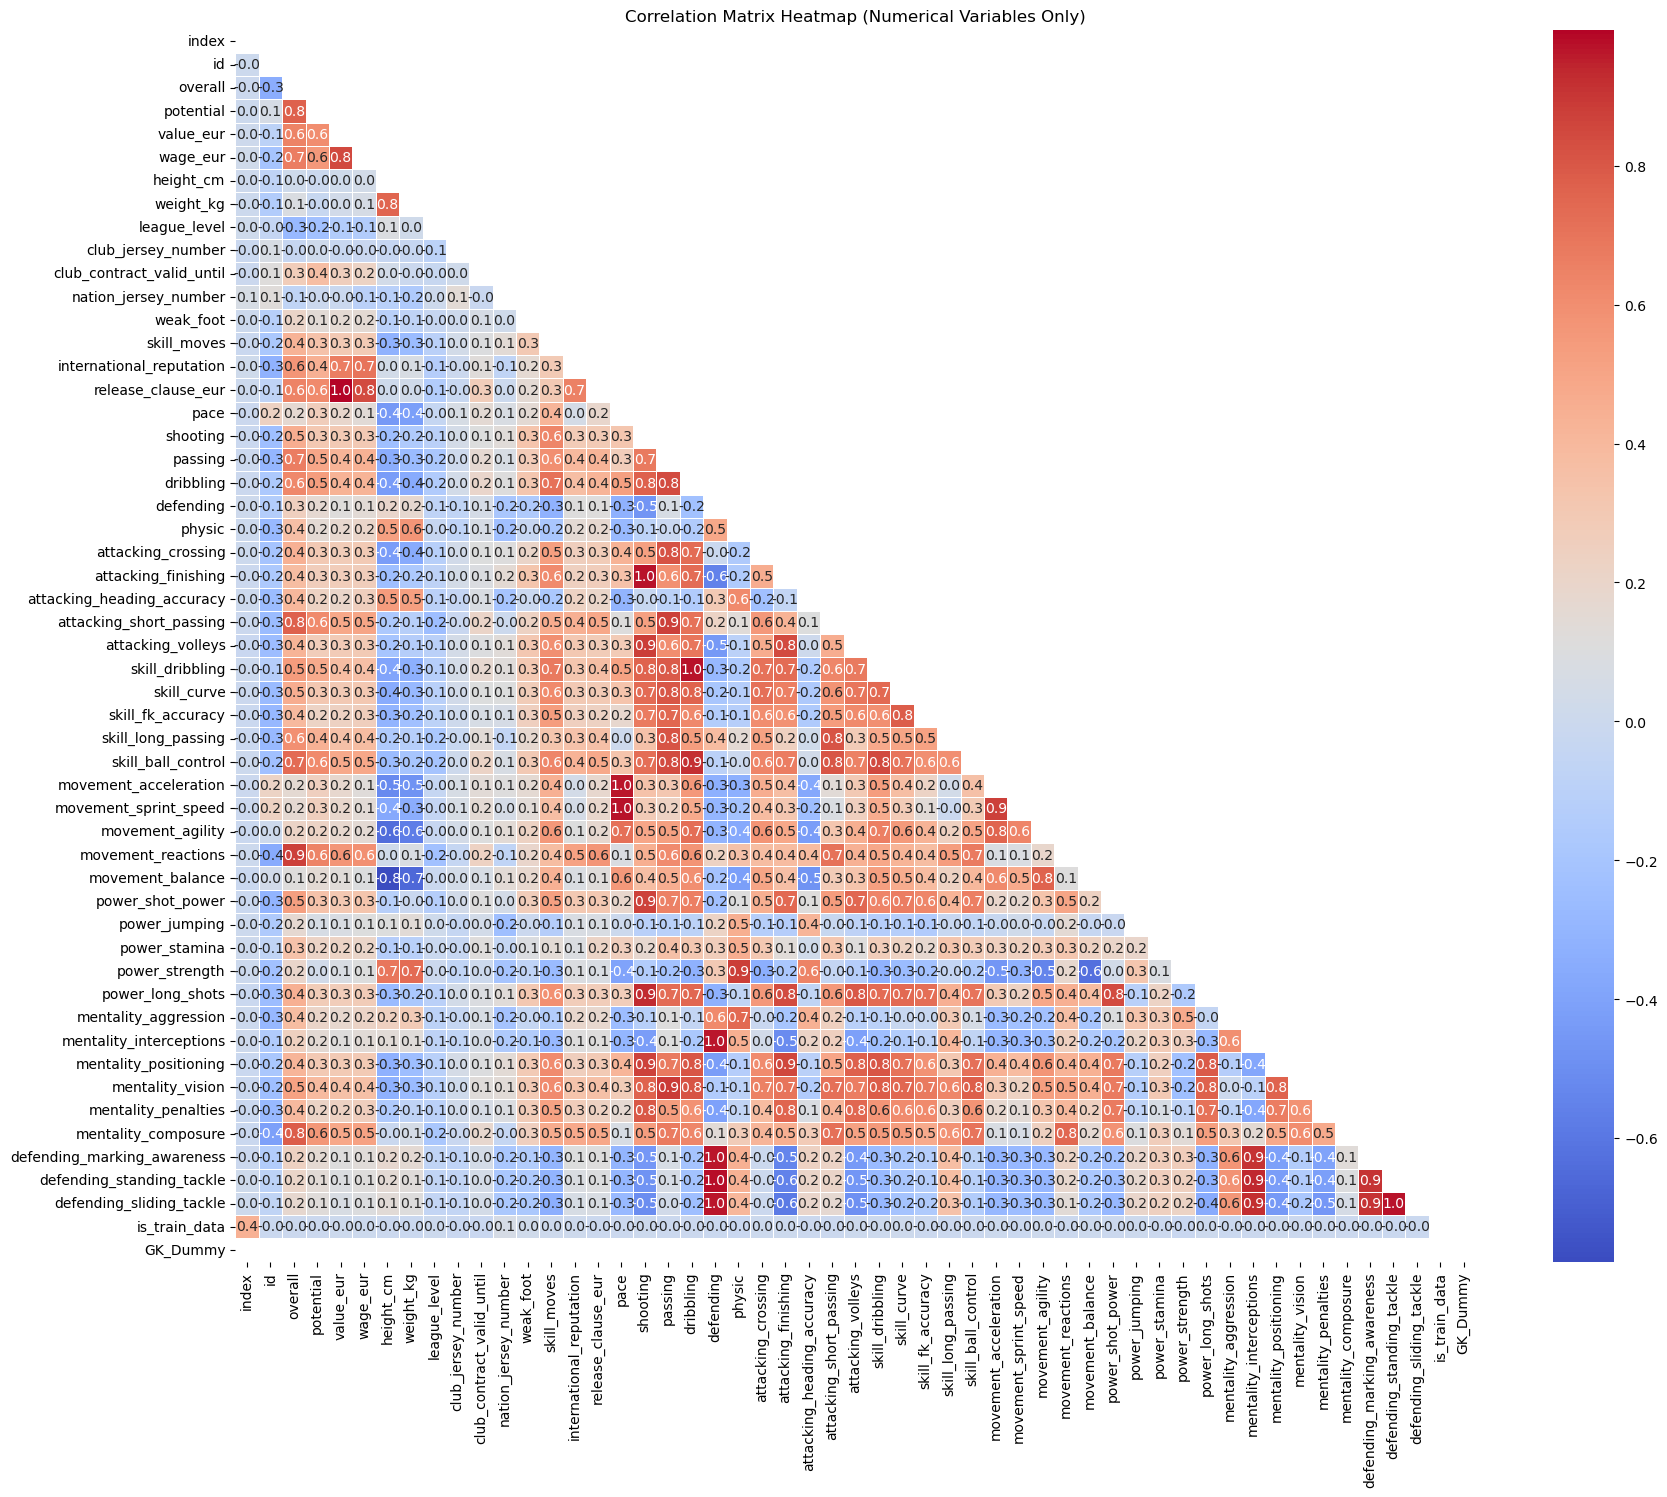

In [11]:
# Selecting numerical columns except those to be excluded
numerical_columns = [col for col in df_without_gk.select_dtypes(include='number').columns]

# Creating a new dataframe with only the selected numerical columns
selected_df = df_without_gk[numerical_columns]

# Correlation matrix 
correlation_matrix = selected_df.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(correlation_matrix)
# Create a heatmap
plt.figure(figsize=(20, 16)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5, mask=matrix)
plt.title("Correlation Matrix Heatmap (Numerical Variables Only)")
plt.show()

There are a lot of variables, that are perfectly correlated (dealing with them later):
- release_clause_eur and value_eur
- attacking_finishing and shooting
- skill_dribbling and dribbling
- movement_acceleration, movement_sprint_speed and pace
- mentality_interceptions, defending_making_awareness, defending_standing_tackle and defending_sliding_tackle

Also, there are a lot of variables that have a high correlation. We define a function that summarises high correlated variables.

In [12]:
def print_high_correlations(df, threshold=0.8):
    # Calculate correlation matrix
    correlation_matrix = df.corr()

    # Find correlations higher than the threshold
    high_correlations = (correlation_matrix.abs() > threshold) & (correlation_matrix < 1)

    # Keep track of printed columns to avoid redundancy
    printed_columns = set()

    # Print the results
    for column in high_correlations.columns:
        correlated_columns = high_correlations.index[high_correlations[column]].tolist()
        if len(correlated_columns) > 0:
            # Check if the column has been printed before
            if column not in printed_columns:
                # Calculate mean correlation value
                correlation_values = [correlation_matrix.loc[column, col] for col in correlated_columns]
                mean_correlation = sum(correlation_values) / len(correlation_values)
                print(f"High correlation for '{column}': {', '.join(correlated_columns)} (Mean Correlation: {mean_correlation:.2f})")
                printed_columns.add(column)
            # Mark the correlated columns as printed
            printed_columns.update(correlated_columns)

In [13]:
print_high_correlations(selected_df)

High correlation for 'overall': movement_reactions (Mean Correlation: 0.87)
High correlation for 'value_eur': wage_eur, release_clause_eur (Mean Correlation: 0.92)
High correlation for 'pace': movement_acceleration, movement_sprint_speed (Mean Correlation: 0.97)
High correlation for 'shooting': attacking_finishing, attacking_volleys, power_shot_power, power_long_shots, mentality_positioning (Mean Correlation: 0.90)
High correlation for 'passing': dribbling, attacking_crossing, attacking_short_passing, skill_curve, skill_long_passing, skill_ball_control, mentality_vision (Mean Correlation: 0.84)
High correlation for 'defending': mentality_interceptions, defending_marking_awareness, defending_standing_tackle, defending_sliding_tackle (Mean Correlation: 0.97)
High correlation for 'physic': power_strength (Mean Correlation: 0.88)


In order to decide which of the correlated variables to keep, we use XGboost to examine the effect of tthe numericl variables on the position

In [14]:
X = df_without_gk[df_without_gk['is_train_data']==1][numerical_columns]
y = df_without_gk[df_without_gk['is_train_data']==1]['position']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

([<matplotlib.axis.YTick at 0x13460d650>,
 [Text(0, 0, 'GK_Dummy'),
  Text(0, 1, 'is_train_data'),
  Text(0, 2, 'weak_foot'),
  Text(0, 3, 'index'),
  Text(0, 4, 'skill_moves'),
  Text(0, 5, 'value_eur'),
  Text(0, 6, 'potential'),
  Text(0, 7, 'club_contract_valid_until'),
  Text(0, 8, 'release_clause_eur'),
  Text(0, 9, 'movement_reactions'),
  Text(0, 10, 'weight_kg'),
  Text(0, 11, 'power_shot_power'),
  Text(0, 12, 'mentality_aggression'),
  Text(0, 13, 'wage_eur'),
  Text(0, 14, 'skill_curve'),
  Text(0, 15, 'mentality_composure'),
  Text(0, 16, 'attacking_volleys'),
  Text(0, 17, 'id'),
  Text(0, 18, 'league_level'),
  Text(0, 19, 'power_jumping'),
  Text(0, 20, 'movement_balance'),
  Text(0, 21, 'passing'),
  Text(0, 22, 'power_stamina'),
  Text(0, 23, 'skill_ball_control'),
  Text(0, 24, 'height_cm'),
  Text(0, 25, 'mentality_penalties'),
  Text(0, 26, 'power_long_shots'),
  Text(0, 27, 'skill_fk_accuracy'),
  Text(0, 28, 'movement_agility'),
  Text(0, 29, 'physic'),
  Text(0,

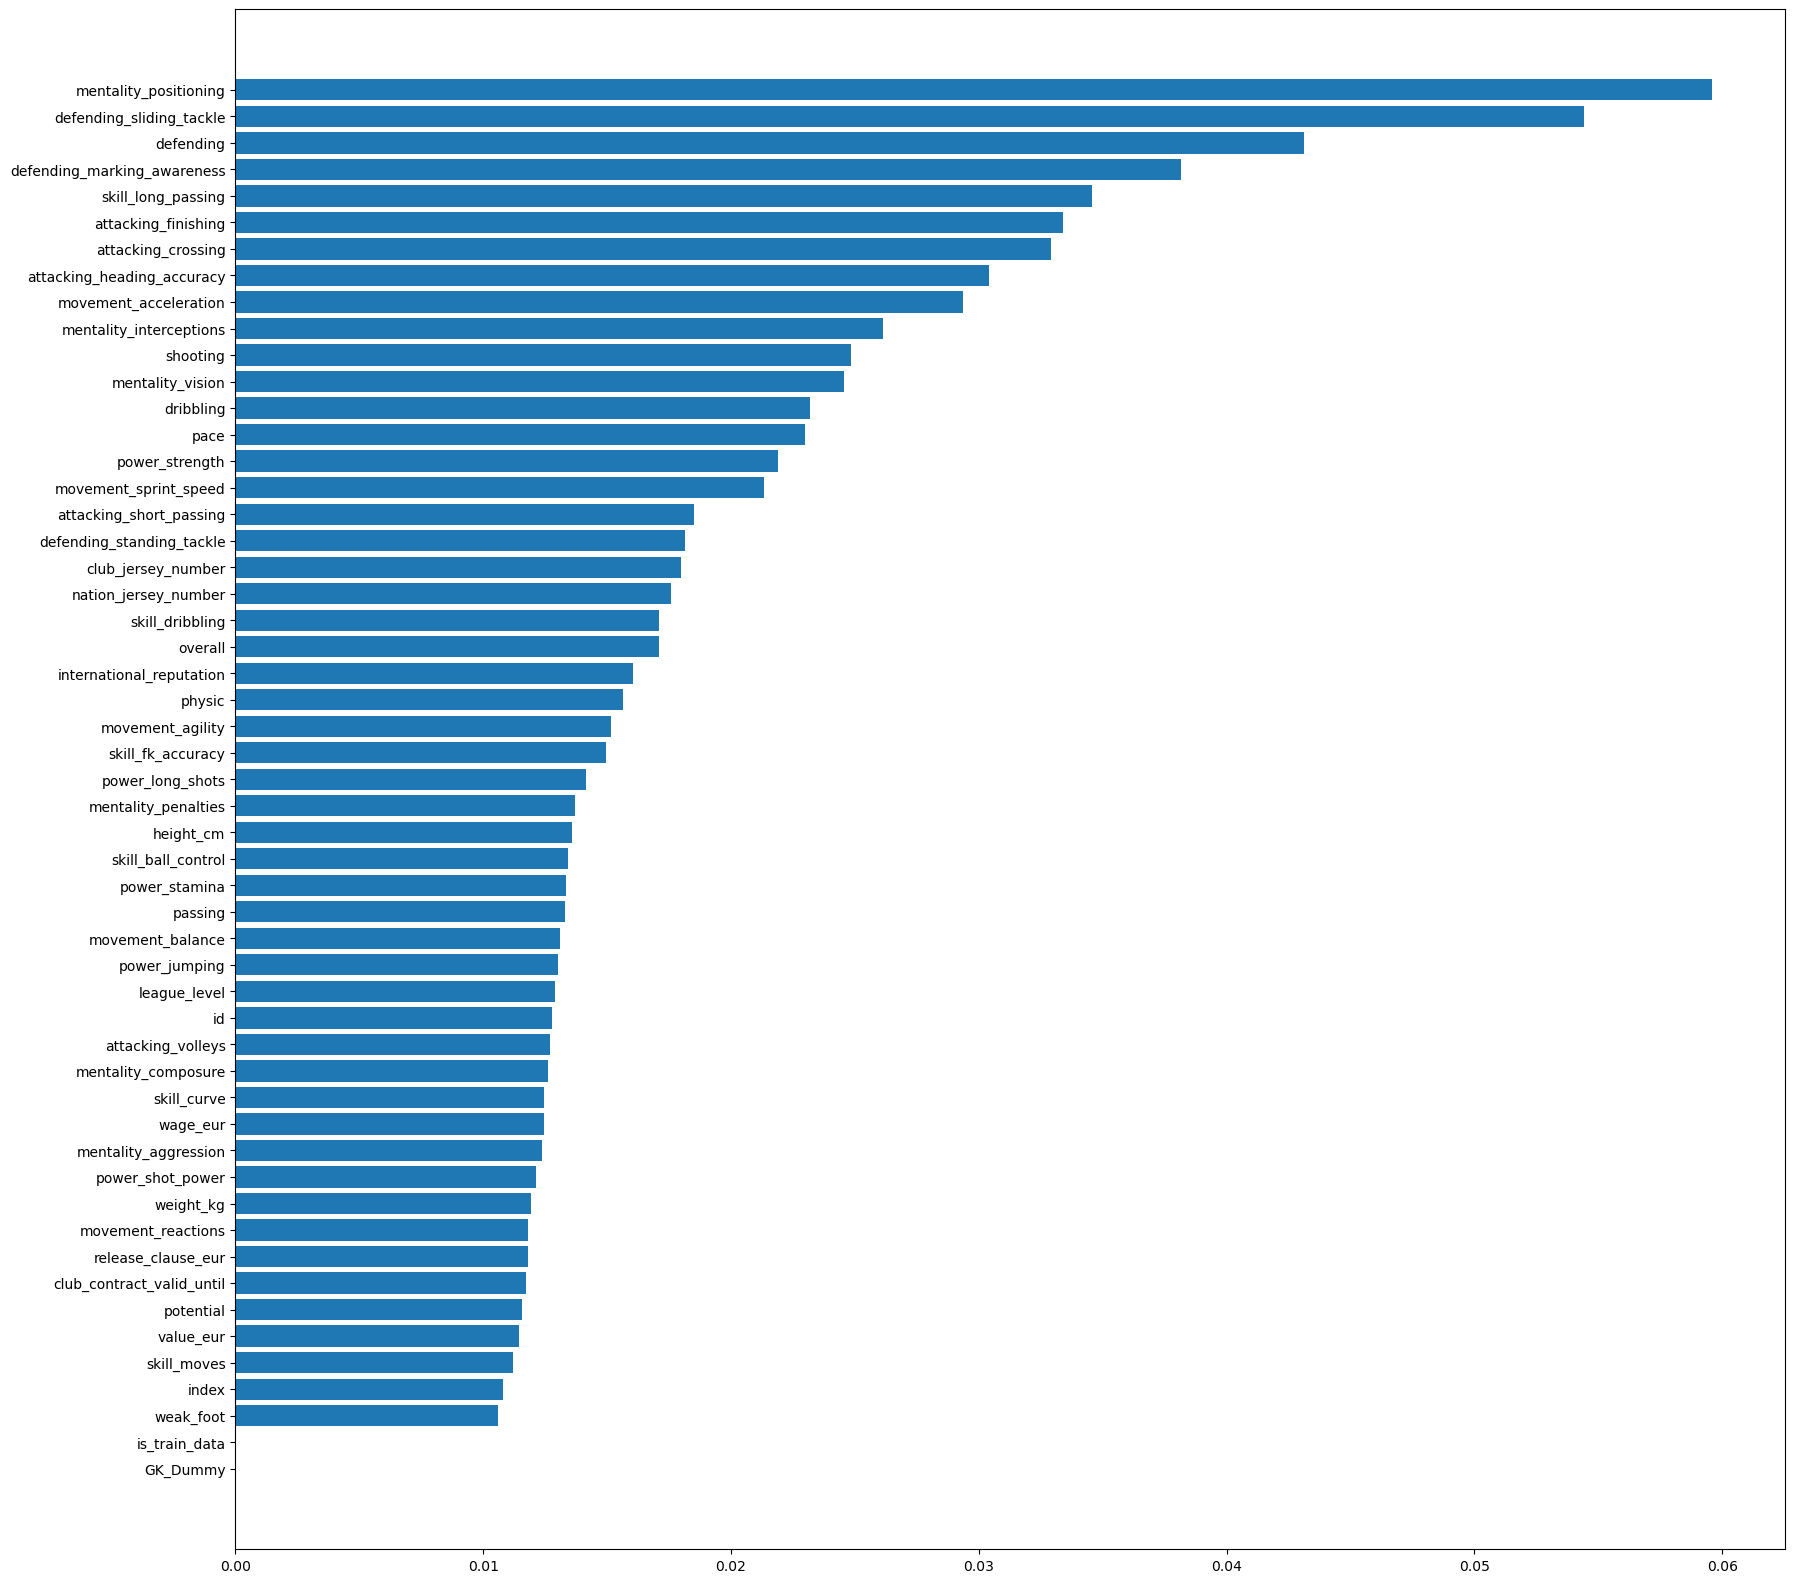

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = XGBClassifier()
model.fit(X_train, y_train)
sorted_indices = np.argsort(model.feature_importances_)

# Access feature names from the model
feature_names = X.columns


plt.figure(figsize=[20, 20])
plt.barh(range(len(sorted_indices)), model.feature_importances_[sorted_indices])
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])

Dealing with all correlation

High correlation for 'overall': movement_reactions (Mean Correlation: 0.87): overall has higher impact on position

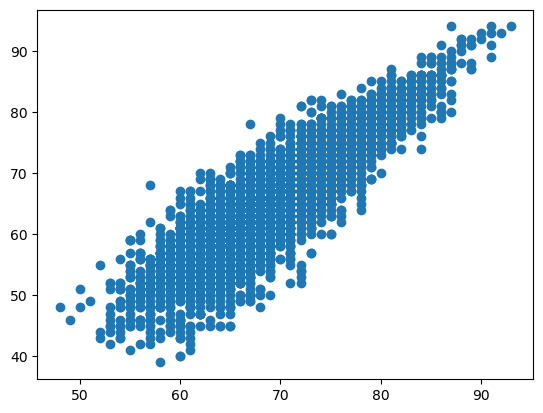

In [16]:
# look at scatterplot
plt.scatter(df_without_gk['overall'], df_without_gk['movement_reactions'])

Since they have the same scale, we can just drop movement_reactions

In [17]:
df.drop('movement_reactions', axis=1, inplace=True)

High correlation for 'pace': movement_acceleration, movement_sprint_speed (Mean Correlation: 0.97): highest impact has movement_acceleration

In [18]:
# look at values in each of the variables

df_without_gk[['pace', 'movement_acceleration', 'movement_sprint_speed']].describe()

,pace,movement_acceleration,movement_sprint_speed
count,6961,6961,6961
mean,68.6,68.5,68.6
std,11.7,12.2,12.0
min,28,29,28
25%,62,62,63
50%,70,70,70
75%,77,77,77
max,97,97,97


Since all have nearly the same values, we just drop pace and movement_sprint_speed

In [19]:
columns_to_drop = ['pace', 'movement_sprint_speed']	

# Drop the specified columns
df_without_gk.drop(columns=columns_to_drop, inplace=True)

High correlation for 'shooting': attacking_finishing, attacking_volleys, power_shot_power, power_long_shots, mentality_positioning (Mean Correlation: 0.90): highest impact has mentality positioning

In [20]:
# look at values in each of the variables

df_without_gk[['shooting', 'attacking_finishing', 'attacking_volleys', 'power_shot_power', 'power_long_shots', 'mentality_positioning']].describe()

,shooting,attacking_finishing,attacking_volleys,power_shot_power,power_long_shots,mentality_positioning
count,6961,6961,6961,6961,6961,6961
mean,54.3,51.8,48.0,61.6,53.6,57.3
std,14.4,16.6,15.4,13.1,16.0,14.7
min,18,10,10,20,11,12
25%,43,38,35,54,42,49
50%,57,55,49,64,57,60
75%,65,65,59,71,66,68
max,94,95,90,94,94,96


Since the means are quite different, we introduce a knew variable, that is the mean of all these variables and drop them afterwards

In [21]:
df_without_gk['shooting_attacking_power']= df_without_gk[['shooting', 'attacking_finishing', 'attacking_volleys', 'power_shot_power', 'power_long_shots', 'mentality_positioning']].mean(axis=1)

columns_to_drop = ['shooting', 'attacking_finishing', 'attacking_volleys', 'power_shot_power', 'power_long_shots', 'mentality_positioning']	

# Drop the specified columns
df_without_gk.drop(columns=columns_to_drop, inplace=True)

High correlation for 'passing': dribbling, attacking_crossing, attacking_short_passing, skill_curve, skill_long_passing, skill_ball_control, mentality_vision (Mean Correlation: 0.84): highest impact has skill_longpassing

In [22]:
df_without_gk[['passing', 'dribbling', 'attacking_crossing', 'attacking_short_passing', 'skill_curve', 'skill_long_passing', 'skill_ball_control', 'mentality_vision']].describe()

,passing,dribbling,attacking_crossing,attacking_short_passing,skill_curve,skill_long_passing,skill_ball_control,mentality_vision
count,6961,6961,6961,6961,6961,6961,6961,6961
mean,60.1,64.6,56.7,65.7,53.9,59.7,65.9,58.3
std,9.6,9.3,13.7,8.2,15.3,11.0,8.7,12.8
min,25,29,15,24,13,20,27,17
25%,54,59,48,61,42,53,61,50
50%,60,65,59,66,55,61,66,60
75%,67,71,66,71,65,67,72,67
max,93,95,94,94,94,93,96,95


Since the means are quite different, we introduce a knew variable, that is the mean of all these variables and drop them afterwards

In [23]:
df_without_gk['attacking_skill']= df_without_gk[['passing', 'dribbling', 'attacking_crossing', 'attacking_short_passing', 'skill_curve', 'skill_long_passing', 'skill_ball_control', 'mentality_vision']].mean(axis=1)

columns_to_drop = ['passing', 'dribbling', 'attacking_crossing', 'attacking_short_passing', 'skill_curve', 'skill_long_passing', 'skill_ball_control', 'mentality_vision']

# Drop the specified columns
df_without_gk.drop(columns=columns_to_drop, inplace=True)

High correlation for 'defending': mentality_interceptions, defending_marking_awareness, defending_standing_tackle, defending_sliding_tackle (Mean Correlation: 0.97): highest impact has defedning_sliding_tackle

In [24]:
# look at values in each of the variables

df_without_gk[['defending','mentality_interceptions', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle']].describe()

,defending,mentality_interceptions,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
count,6961,6961,6961,6961,6961
mean,55.6,54.9,54.9,56.1,53.4
std,15.6,17.7,16.8,17.9,18.1
min,16,10,10,10,10
25%,43,42,42,43,39
50%,61,61,60,63,60
75%,67,68,67,69,66
max,91,91,92,93,92


Since all have nearly the same values, we just drop all columns except defending_sliding_tackle

In [25]:
columns_to_drop = ['defending','mentality_interceptions', 'defending_marking_awareness', 'defending_standing_tackle']

# Drop the specified columns
df_without_gk.drop(columns=columns_to_drop, inplace=True)

High correlation for 'physic': power_strength (Mean Correlation: 0.88): highest impact has power_strength

In [26]:
# look at values in each of the variables

df_without_gk[['physic','power_strength']].describe()

,physic,power_strength
count,6961,6961
mean,68.3,68.8
std,8.5,11.7
min,31,25
25%,63,62
50%,69,70
75%,74,77
max,90,95


Since all have nearly the same values, we just drop physic

In [27]:
columns_to_drop = ['physic']

# Drop the specified columns
df_without_gk.drop(columns=columns_to_drop, inplace=True)

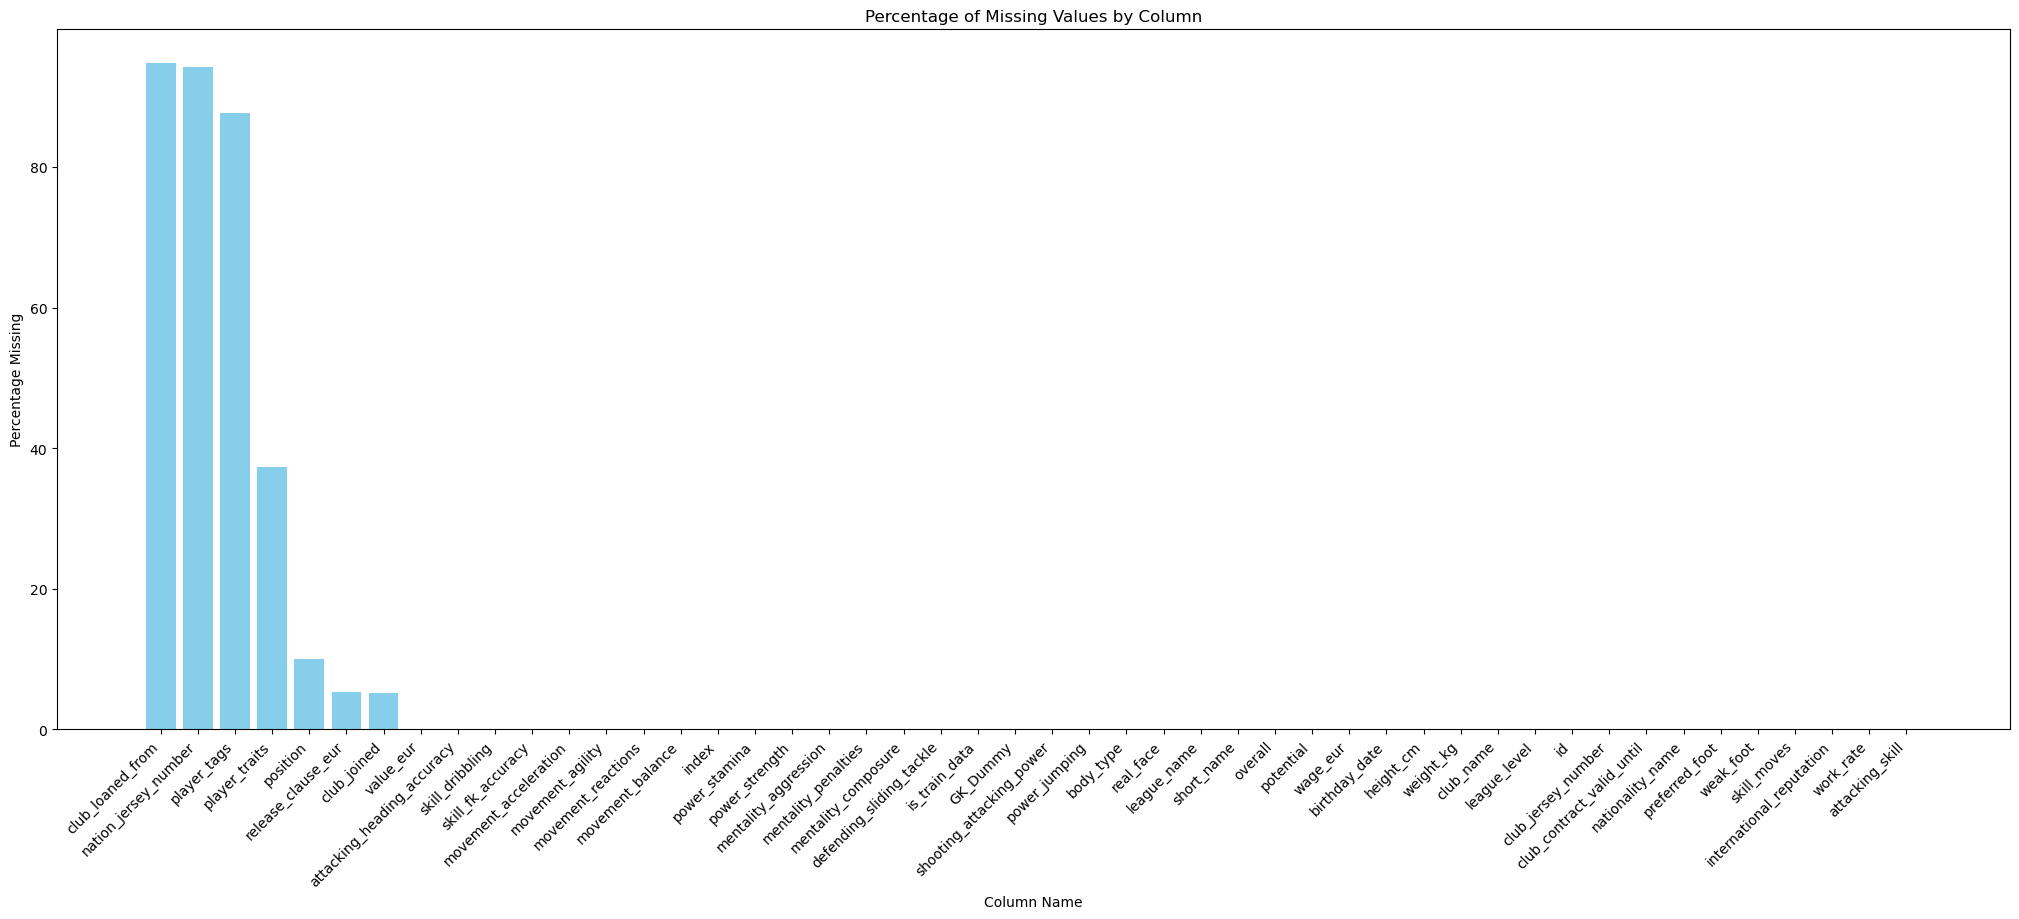


Columns with Missing Values (Descending Order):
club_loaned_from: 94.83% (Categorical)
nation_jersey_number: 94.27% (Numerical)
player_tags: 87.7% (Categorical)
player_traits: 37.37% (Categorical)
position: 10.01% (Categorical)
release_clause_eur: 5.24% (Numerical)
club_joined: 5.17% (Categorical)
value_eur: 0.07% (Numerical)


In [28]:
calculate_missing_info_print_only(df_without_gk)


Now I wil drop club_loaned_from, nation_jersey_number and club_joined

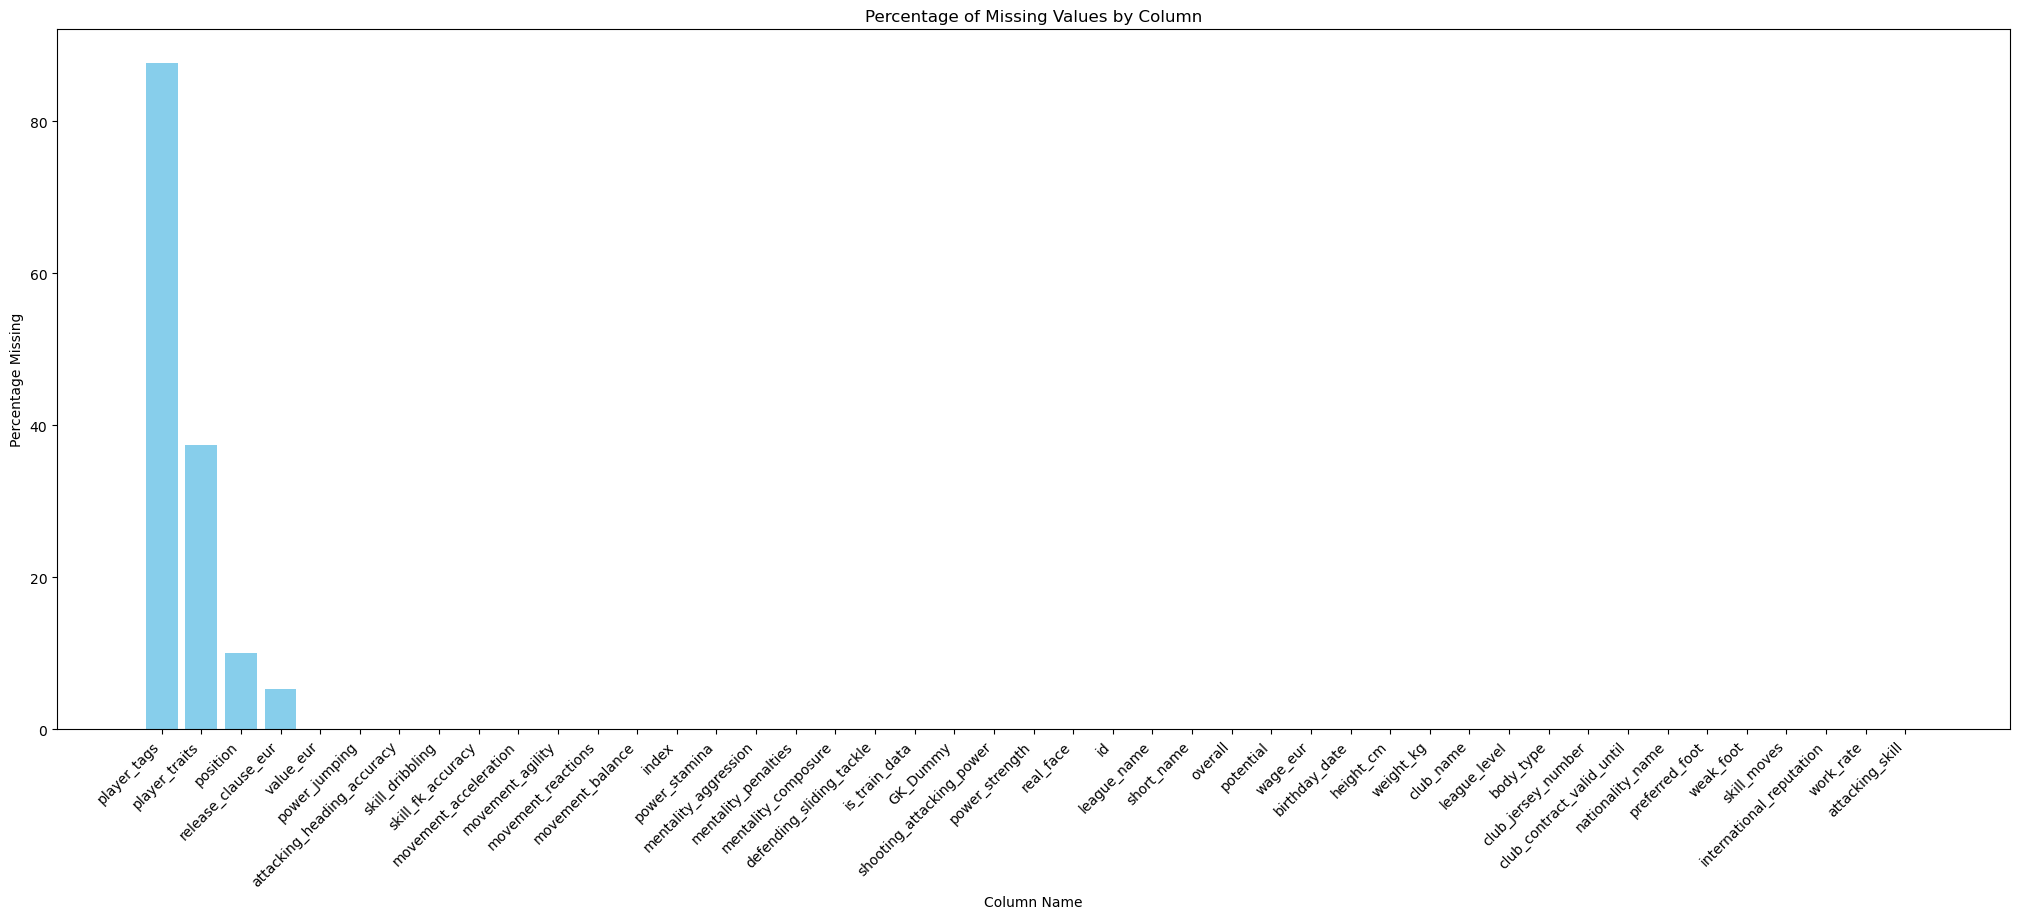


Columns with Missing Values (Descending Order):
player_tags: 87.7% (Categorical)
player_traits: 37.37% (Categorical)
position: 10.01% (Categorical)
release_clause_eur: 5.24% (Numerical)
value_eur: 0.07% (Numerical)


In [29]:
def drop_columns(df):
    return df.drop(['club_loaned_from', 'nation_jersey_number', 'club_joined'], axis=1)

df_without_gk=drop_columns(df_without_gk)

calculate_missing_info_print_only(df_without_gk)


Taking care of value_eur and release_clause_eur.

Release_clause_eur is correlated almost as 1 with value_eur. 
We just have 5 observations without value and they dont have release_clause_eur.





In [30]:
corr_release_value = df_without_gk[['release_clause_eur', 'value_eur']].corr()
corr_release_value

,release_clause_eur,value_eur
release_clause_eur,1,1.0
value_eur,1.0,1


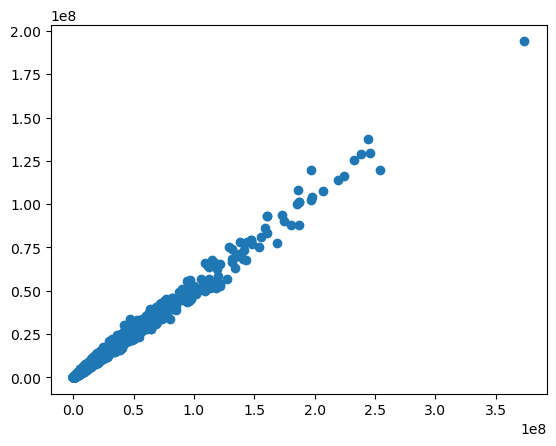

In [31]:
plt.scatter(df_without_gk['release_clause_eur'], df_without_gk['value_eur'])

In [32]:
print(df_without_gk['release_clause_eur'].mean())
print(df_without_gk['value_eur'].mean())

8240939.660400243
4373757.906843013


From the scatterplot and from the means you can see that both variables have nearly a 1 to 2 relationship. That is how we impute the missing values in value_eur

In [33]:
df_without_gk[(df_without_gk['value_eur'].isna()) & (df_without_gk['release_clause_eur'].isna())]

,index,id,short_name,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,...,power_strength,mentality_aggression,mentality_penalties,mentality_composure,defending_sliding_tackle,position,is_train_data,GK_Dummy,shooting_attacking_power,attacking_skill
26,10,115909,Rubén Castro,69,69,NaN,3000,1981-06-27,169,68,...,61,54,75,68,14,NaN,0,0,70.2,63.6
30,4001,124344,İ. Öztürk,67,67,NaN,3000,1981-06-21,186,80,...,78,78,51,51,62,CB,1,0,45.2,47.5
44,633,140222,P. Da Silva,67,67,NaN,500,1980-02-01,180,76,...,83,70,43,70,64,NaN,0,0,34.7,44.8
79,5599,152912,J. Sand,75,75,NaN,13000,1980-07-17,182,79,...,83,73,85,85,25,LS,1,0,78.3,63.1
115,147,158293,Zheng Zhi,67,67,NaN,5000,1980-08-20,180,75,...,63,87,68,72,62,NaN,0,0,64.2,67


SInce all rows with missing values in 'value_eur' also have missing values in 'release_clause_eur' it is not possible.

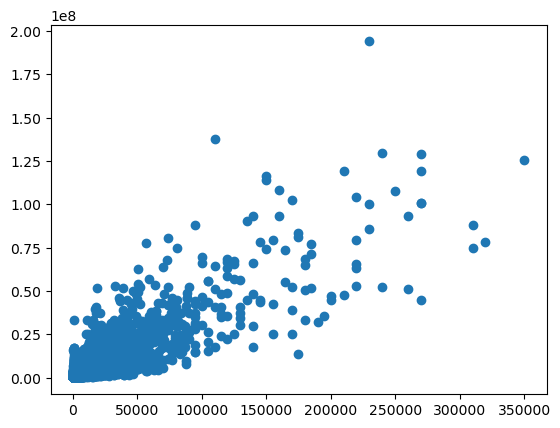

,wage_eur,value_eur
wage_eur,1,0.8
value_eur,0.8,1


In [34]:
plt.scatter(df_without_gk['wage_eur'], df_without_gk['value_eur'])
plt.show()

corr_wage = df_without_gk[['wage_eur', 'value_eur']].corr()
corr_wage

Also quite high correlation between those two

In [35]:
df_without_gk['wage_eur'].isna().sum()

0

We don't have missing values in 'wage_eur' and a stron correlation to 'value_eur' (0.8) and 'release_clause_eur' (0.8). As a result, instead of dealing with missing values in 'value_eur' and/or 'release_clause_eur' we drop these columns

In [36]:
columns_to_drop = ['value_eur', 'release_clause_eur']	

# Drop the specified columns
df_without_gk.drop(columns=columns_to_drop, inplace=True)

For the moment, I will put the KNN the value_eur and drop release_clause_eur.

In [37]:
# def fill_value_eur_with_knn_and_print_details_v2(df, target_column='value_eur', n_neighbors=5):
#     categorical_columns = ['club_name', 'league_name', 'preferred_foot']

#     # Selecting numeric columns for KNN imputation
#     numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
#     df_numeric = df[numeric_columns]

#     # Creating a temporary DataFrame with encoded categorical variables
#     df_temp = df.copy()
#     for col in categorical_columns:
#         if col in df_temp.columns:
#             encoder = OrdinalEncoder()
#             df_temp[col] = encoder.fit_transform(df_temp[[col]])

#     # Merging numeric and encoded categorical data for imputation
#     df_temp = pd.concat([df_numeric, df_temp[categorical_columns]], axis=1)

#     # KNN imputer
#     imputer = KNNImputer(n_neighbors=n_neighbors)
#     df_imputed = imputer.fit_transform(df_temp)
#     df_imputed = pd.DataFrame(df_imputed, columns=df_temp.columns)

#     # Identify the indices where 'value_eur' was originally missing
#     missing_value_indices = df[df[target_column].isnull()].index

#     # Update the target column in the original DataFrame with imputed values
#     df[target_column] = df_imputed[target_column]

#     # Print the detailed imputed values and the club's median values
#     for index in missing_value_indices:
#         player_name = df.at[index, 'short_name']
#         club_name = df.at[index, 'club_name']
#         imputed_value = df_imputed.at[index, target_column]
#         club_median_value = df.groupby('club_name')[target_column].median().loc[club_name]
#         print(f"{player_name} has been filled with {imputed_value}. He plays for {club_name}, where the median wage is {club_median_value}.")

#     return df

# # Applying the function to the DataFrame
# df_filled_with_details_v2 = fill_value_eur_with_knn_and_print_details_v2(df)


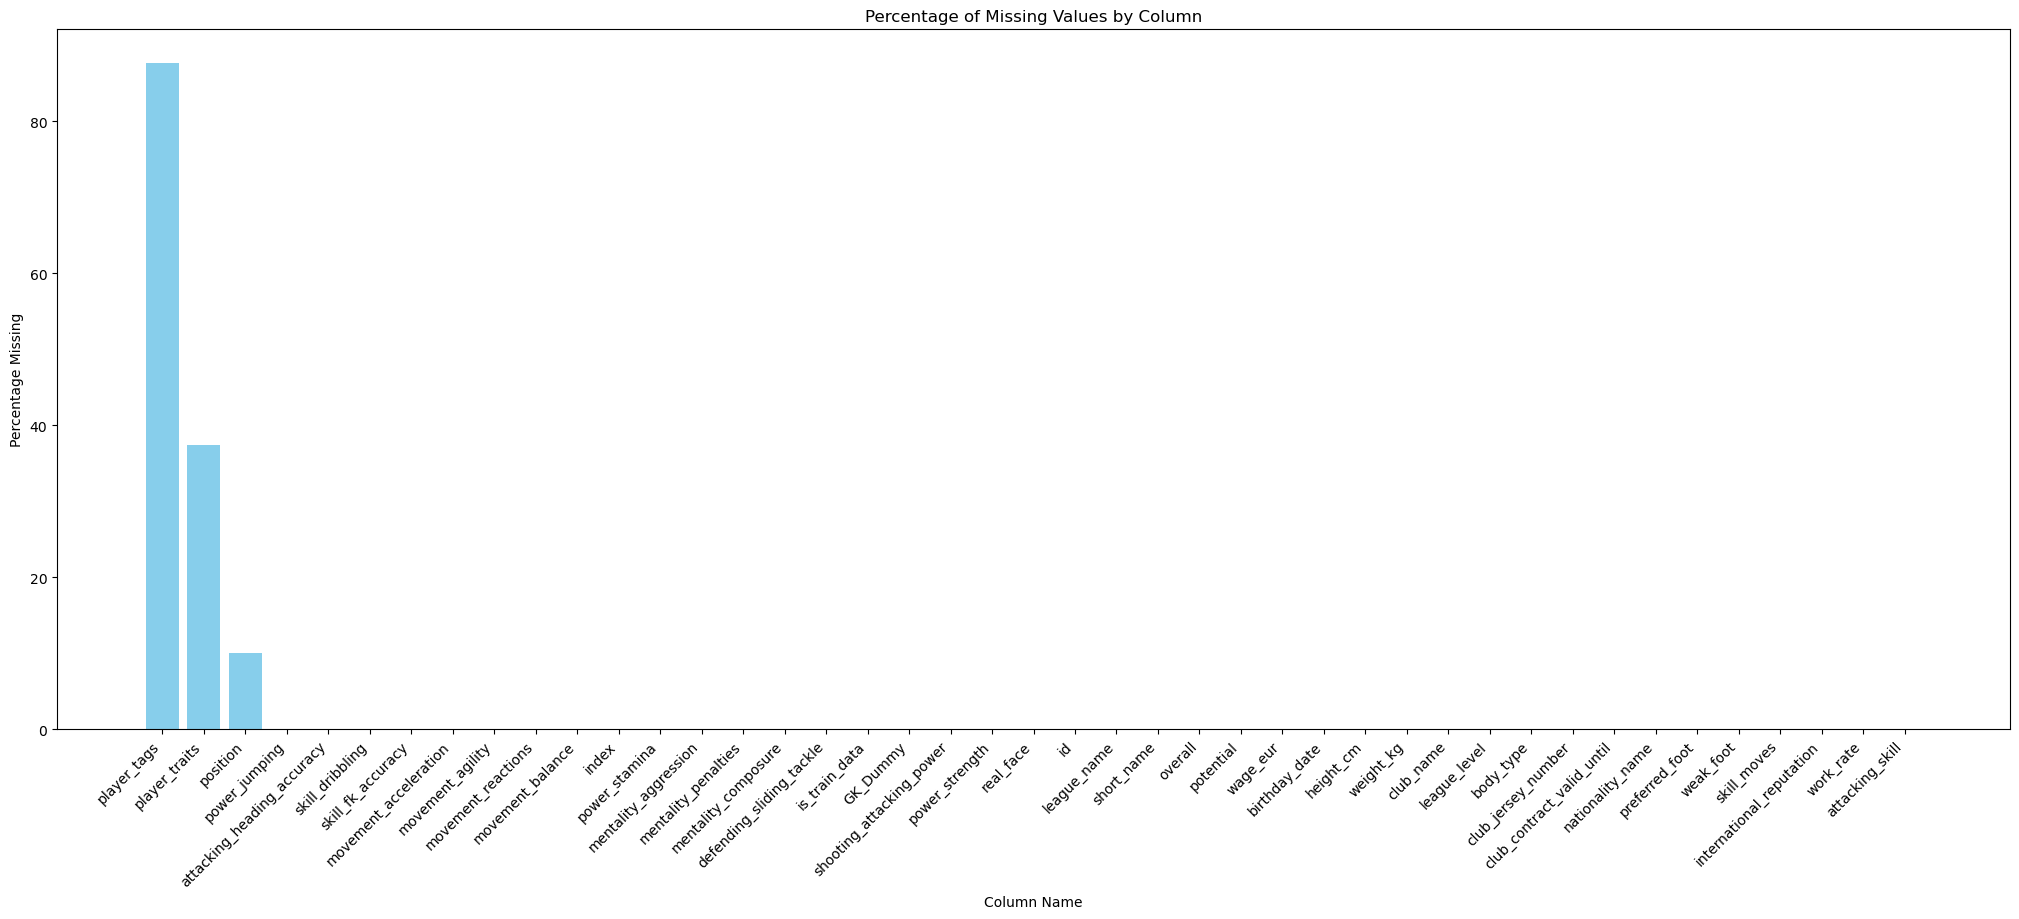


Columns with Missing Values (Descending Order):
player_tags: 87.7% (Categorical)
player_traits: 37.37% (Categorical)
position: 10.01% (Categorical)


In [38]:
# def drop_column_release_clause(df):
#     return df.drop(['release_clause_eur'], axis=1)

# df=drop_column_release_clause(df)

calculate_missing_info_print_only(df_without_gk)


I will deal with these later.

In [39]:
numerical_columns = [col for col in df_without_gk.select_dtypes(include='number').columns]

df_without_gk.groupby('position')[numerical_columns].mean()

,index,id,overall,potential,wage_eur,height_cm,weight_kg,league_level,club_jersey_number,club_contract_valid_until,...,power_stamina,power_strength,mentality_aggression,mentality_penalties,mentality_composure,defending_sliding_tackle,is_train_data,GK_Dummy,shooting_attacking_power,attacking_skill
position,,,,,,,,,,,,,,,,,,,,,
CAM,3229.3,221775.7,70.6,73.9,14906.7,177.4,72.0,1.3,15.9,2022.9,...,71.0,62.1,57.2,62.5,67.9,43.4,1,0,66.0,69.2
CB,3233.2,215393.5,67.6,70.1,8974.9,186.5,80,1.5,14.2,2022.6,...,67.5,79.0,69.7,41.3,60.3,66.1,1,0,37.7,50.0
CDM,3421,223155.3,69.8,73.2,16554.6,181.6,75.1,1.3,16.0,2022.9,...,76.4,70.3,70.8,52.8,67.0,65.4,1,0,55.6,64.0
CM,3440.3,214890.0,69.5,72.2,10849.3,178.5,72.9,1.5,14.5,2022.8,...,76.3,67.4,67.3,57.2,67.6,61.4,1,0,58.6,66.1
LB,3516.1,226582.3,68.3,71.4,11254.4,178.0,72.2,1.3,17.5,2022.7,...,74.4,64.7,63.7,47.1,60.9,64.5,1,0,49.6,61.5
LCB,3405.1,222494.9,68.4,71.6,10509.9,186.5,80.0,1.4,14.8,2022.7,...,67.8,78.1,69.6,42.7,61.5,67.1,1,0,39.1,52.1
LCM,3423.3,224611.1,68.7,72.0,12364.4,178.6,72.9,1.4,17.4,2022.8,...,74.4,65.2,64.9,55.8,65.9,58.5,1,0,59.5,66.1
LDM,3453.0,223109.3,69.5,72.5,13528.1,179.7,73.3,1.3,16.4,2022.9,...,76.6,69.0,69.8,54.3,66.4,63.1,1,0,57.4,65.2
LF,3246.5,234206.8,69.3,74.1,11673.4,175.6,69.8,1.2,22.6,2022.8,...,71.6,58.0,55.5,57.8,64.7,34.3,1,0,63.8,66.3


looking again at correlation to see whether all variables now are relevant

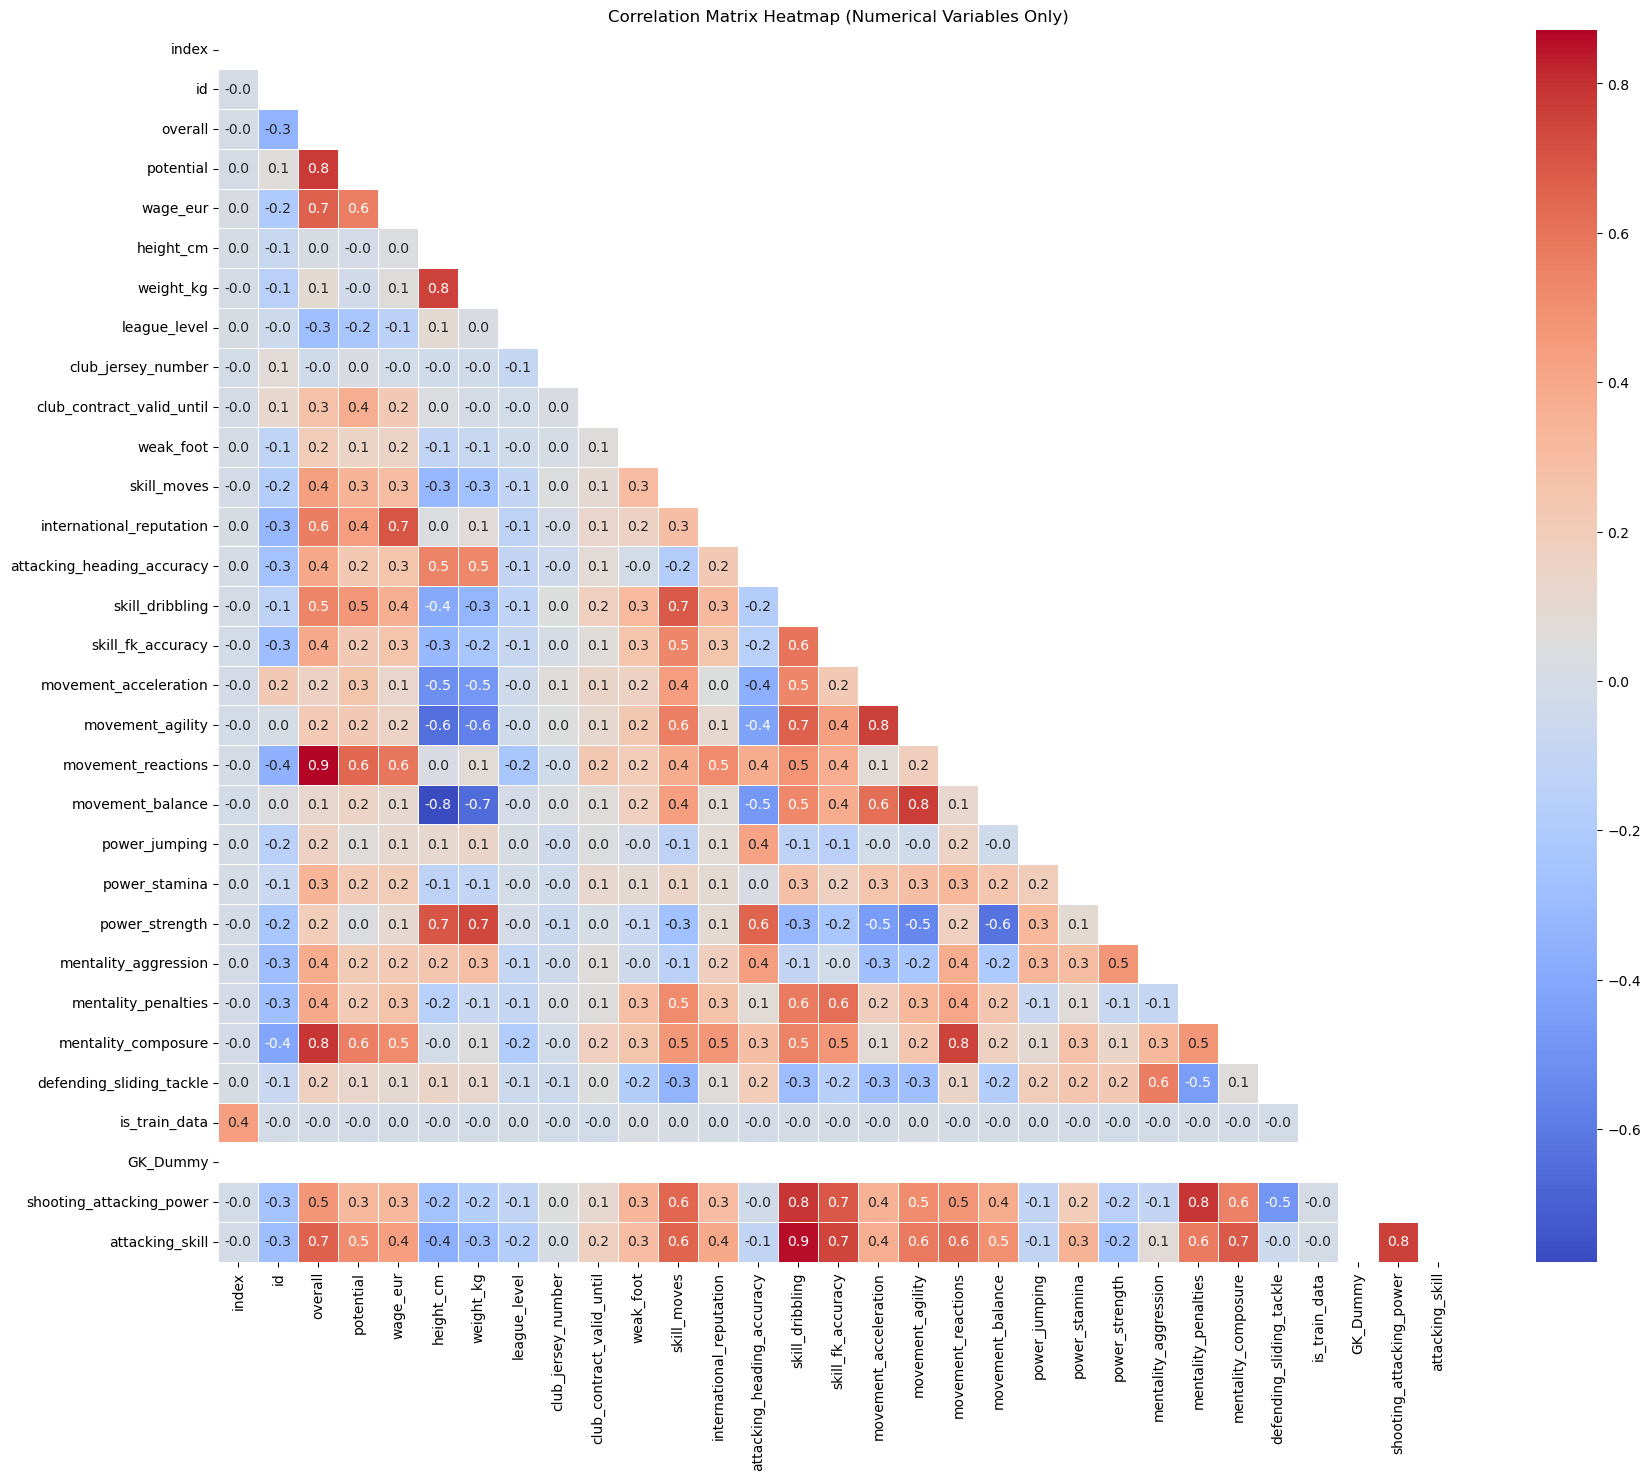

In [40]:
# Selecting numerical columns except those to be excluded
numerical_columns = [col for col in df_without_gk.select_dtypes(include='number').columns]

# Creating a new dataframe with only the selected numerical columns
selected_df = df_without_gk[numerical_columns]

# Correlation matrix 
correlation_matrix = selected_df.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(correlation_matrix)
# Create a heatmap
plt.figure(figsize=(20, 16)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5, mask=matrix)
plt.title("Correlation Matrix Heatmap (Numerical Variables Only)")
plt.show()

there are still some high correltions:
- overall, mentality_composure, movement_reactions, potential
- weight, height
- movement_agility, movement_acceleration
- movement_balance, movement_agility
- attacking_skill, skill_dribbling

overall, mentality_composure, movement_reactions, potential: highest impact has overall

In [41]:
# look at values in each of the variables

df_without_gk[['overall','mentality_composure', 'movement_reactions', 'potential']].describe()

,overall,mentality_composure,movement_reactions,potential
count,6961,6961,6961,6961
mean,68.8,63.5,65.1,72.0
std,5.9,9.3,7.9,6.1
min,48,33,39,53
25%,65,57,60,68
50%,68,64,65,72
75%,72,70,70,76
max,93,96,94,95


Since the means are quite different, we introduce a knew variable, that is the mean of all these variables and drop them afterwards

In [42]:
df_without_gk['overall_potential']= df_without_gk[['overall', 'mentality_composure', 'movement_reactions', 'potential']].mean(axis=1)

columns_to_drop = ['overall', 'mentality_composure', 'movement_reactions', 'potential']

# Drop the specified columns
df_without_gk.drop(columns=columns_to_drop, inplace=True)

weight and height have a correlation, that can be shown in a scatterplot

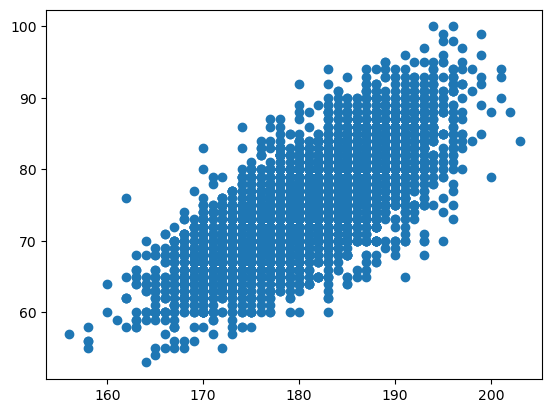

In [43]:
plt.scatter(df_without_gk['height_cm'], df_without_gk['weight_kg'])
plt.show()

to eliminate the collinearity a new variable will be introduced: weight per height

In [44]:
df_without_gk['weight_per_height']= df_without_gk['weight_kg'] / df_without_gk['height_cm']

columns_to_drop = ['weight_kg','height_cm']	

# Drop the specified columns
df_without_gk.drop(columns=columns_to_drop, inplace=True)

movement_agility, movement_acceleration and movement_balance, movement_agility have high correlation. We look at them together

In [45]:
# look at values in each of the variables

df_without_gk[['movement_agility','movement_acceleration', 'movement_balance', 'movement_agility']].describe()

,movement_agility,movement_acceleration,movement_balance,movement_agility
count,6961,6961,6961,6961
mean,67.7,68.5,67.0,67.7
std,12.5,12.2,12.7,12.5
min,28,29,26,28
25%,61,62,60,61
50%,69,70,68,69
75%,76,77,76,76
max,96,97,95,96


Since all have nearly the same values, we just drop all columns except movement_acceleration (higest impact)

In [46]:
columns_to_drop = ['movement_agility', 'movement_balance', 'movement_agility']

# Drop the specified columns
df_without_gk.drop(columns=columns_to_drop, inplace=True)

attacking_skill, skill_dribbling_ highest impact hass skill_dribbling

In [47]:
# look at values in each of the variables

df_without_gk[['attacking_skill','skill_dribbling']].describe()

,attacking_skill,skill_dribbling
count,6961,6961
mean,60.6,62.8
std,9.6,11.8
min,25.8,20
25%,54.4,57
50%,61.1,64
75%,67.1,71
max,92.1,96


Since both are quite similar we drop attacking_skill

In [48]:
columns_to_drop = ['attacking_skill']

# Drop the specified columns
df_without_gk.drop(columns=columns_to_drop, inplace=True)

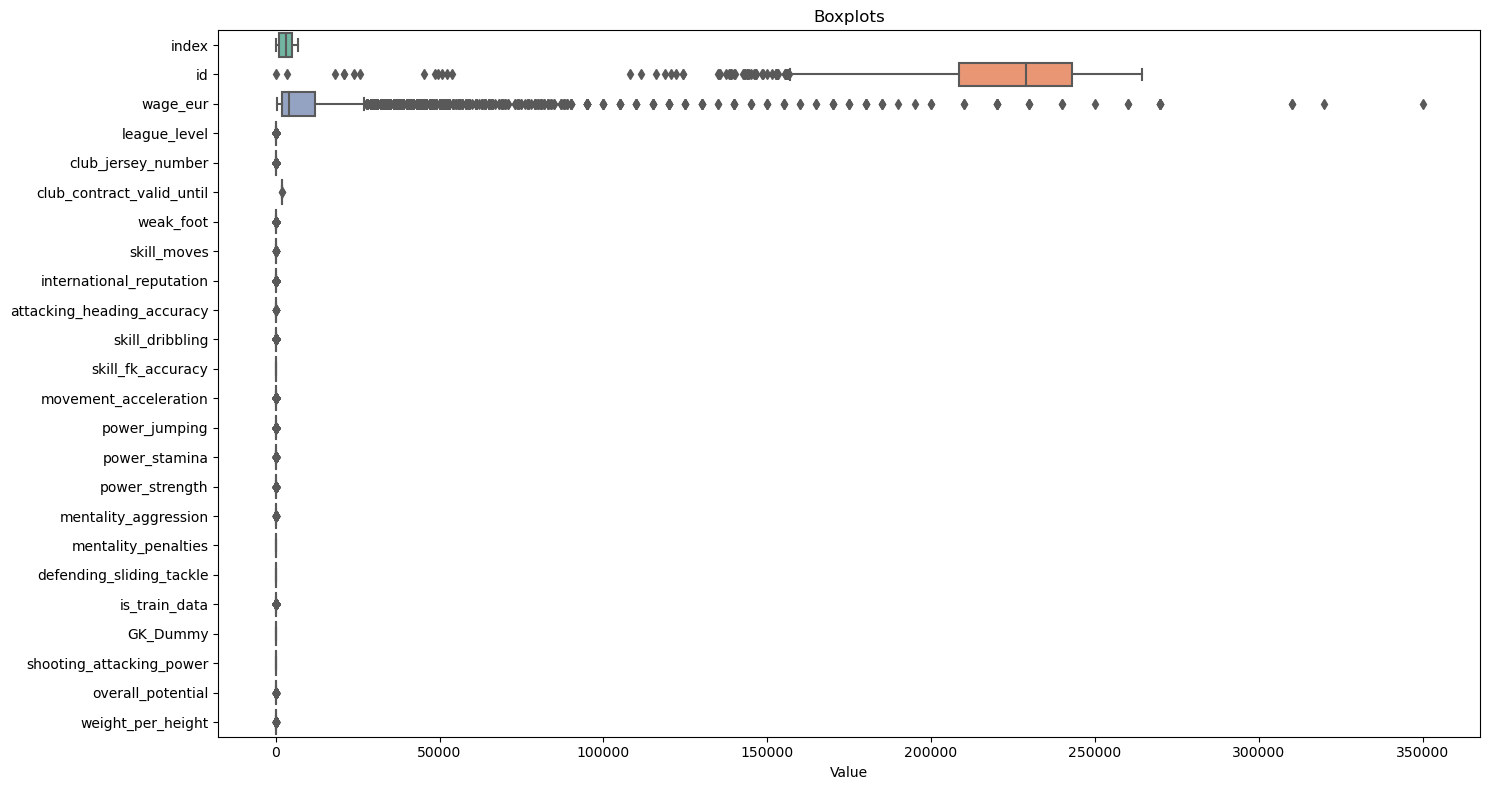

In [49]:
# looking at outliers
numerical_columns = [col for col in df_without_gk.select_dtypes(include='number').columns]
plt.figure(figsize=(15, 8))

sns.boxplot(data=df_without_gk[numerical_columns], orient="h", palette="Set2")
plt.title("Boxplots")
plt.xlabel("Value")

plt.tight_layout()

# Show the plot
plt.show()

In [50]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=df_without_gk[['overall', 'potential', 'league_level', 'club_jersey_number', 'club_contract_valid_until', 'weak_foot', 'skill_moves', 'international_reputation', 'attacking_heading_accuracy', 'skill_dribbling', 'skill_fk_accuracy', 'movement_acceleration', 'movement_reactions', 'power_jumping', 'power_stamina', 'power_strength', 'mentality_aggression', 'mentality_penalties', 'mentality_composure', 'defending_sliding_tackle', 'is_train_data', 'GK_Dummy', 'shooting_attacking_power', 'weight_per_height']], orient="h", palette="Set2")
plt.title("Boxplots")
plt.xlabel("Value")

plt.tight_layout()

# Show the plot
plt.show()


KeyError: "['overall', 'potential', 'movement_reactions', 'mentality_composure'] not in index"

<Figure size 1500x800 with 0 Axes>

# Taking care of categorical variables

In [ ]:
calculate_column_statistics_for_categorical_variables(df_without_gk)

Total number of columns: 36
Number of categorical columns: 12


,Variable,Number of Unique Values,Top 5 Most Frequent Values
0,short_name,6752,"[J. Rodríguez, J. Brown, Danilo, L. Rodríguez, M. Camara]"
1,birthday_date,3959,"[1992-02-29, 1996-02-29, 2000-02-29, 1988-02-29, 1991-01-08]"
2,player_traits,741,"[Speed Dribbler (AI), Power Header, Dives Into Tackles (AI), Long Shot Taker (AI), Long Passer (..."
3,club_name,701,"[Vissel Kobe, Raków Częstochowa, F.C. Hansa Rostock, Cracovia, FC St. Pauli]"
4,nationality_name,144,"[England, Brazil, Germany, Spain, Argentina]"
5,player_tags,64,"[#Strength, #Engine, #Acrobat, #Speedster, #Aerial Threat, #Strength]"
6,league_name,55,"[USA Major League Soccer, Argentina Primera División, English League Championship, English Leagu..."
7,position,23,"[LCB, RCB, RB, LB, ST]"
8,body_type,10,"[Normal (170-185), Lean (170-185), Normal (185+), Lean (185+), Normal (170-)]"
9,work_rate,9,"[Medium/Medium, High/Medium, Medium/High, High/High, High/Low]"


The categorical variable birthday_date could be interesting regarding the age of the player. We therefore encode it to a numerical variable birth_date.

In [ ]:
# Convert 'birthday' to datetime format
df_without_gk['birthday_date'] = pd.to_datetime(df_without_gk['birthday_date'])

# Extract the year and create a new 'year_born' column
df_without_gk['year_born'] = df_without_gk['birthday_date'].dt.year

Look whether categorical variables have an impact on the positions
Mehtod to do this: Chi-Square Test

Null Hypothesis is that both variables are not correlated.If the p-value is below a significance level (e.g., 0.05), you may reject the null hypothesis, indicating a significant association between the two variables.

Function to check whether categorical variables have impact on position

In [ ]:
def chi_square_test(variables):
    for i in variables:
        contingency_table = pd.crosstab(df_without_gk[i], df_without_gk['position'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-Square Value of {i}: {chi2}")
        print(f"P-value of {i}: {p}")
        if p < 0.05:
            print(f'Because of the low p-value we can reject the null hypothesis. Therefore we can say that {i} has an impact on the position and we should keep the column and encode it.')
        else:
            print(f'The very high p-value means that we cannot reject the null hypothesis and therefore have high evidence that {i} has no effect on position. We therefore drop the column')    
        print()

In [ ]:
chi_square_test(df_without_gk[['short_name','player_traits', 'club_name', 'nationality_name', 'player_tags', 'league_name', 'body_type', 'work_rate', 'preferred_foot', 'real_face']])

Chi-Square Value of short_name: 134087.77886574846
P-value of short_name: 0.4005452662420433
The very high p-value means that we cannot reject the null hypothesis and therefore have high evidence that short_name has no effect on position. We therefore drop the column

Chi-Square Value of player_traits: 20208.188545709403
P-value of player_traits: 2.875924981882893e-147
Because of the low p-value we can reject the null hypothesis. Therefore we can say that player_traits has an impact on the position and we should keep the column and encode it.

Chi-Square Value of club_name: 9842.133175374396
P-value of club_name: 1.0
The very high p-value means that we cannot reject the null hypothesis and therefore have high evidence that club_name has no effect on position. We therefore drop the column

Chi-Square Value of nationality_name: 3337.7060466922885
P-value of nationality_name: 0.008709297604703167
Because of the low p-value we can reject the null hypothesis. Therefore we can say that natio

In [ ]:
columns_to_drop = ['short_name', 'club_name', ]

# Drop the specified columns
df_without_gk.drop(columns=columns_to_drop, inplace=True)

I will take care first of the binary variables

In [ ]:
def encode_binary_categorical_and_drop_originals(df):
    if 'preferred_foot' in df.columns:
        df['preferred_foot_encoded'] = df['preferred_foot'].map({'Left': 0, 'Right': 1})
        print("preferred_foot: 'Left' is encoded as 0, 'Right' is encoded as 1")
        df.drop('preferred_foot', axis=1, inplace=True)
    
    if 'real_face' in df.columns:
        df['real_face_encoded'] = df['real_face'].map({'No': 0, 'Yes': 1})
        print("real_face: 'No' is encoded as 0, 'Yes' is encoded as 1")
        df.drop('real_face', axis=1, inplace=True)

    return df
df_without_gk=encode_binary_categorical_and_drop_originals(df_without_gk)

preferred_foot: 'Left' is encoded as 0, 'Right' is encoded as 1
real_face: 'No' is encoded as 0, 'Yes' is encoded as 1


Now, I am going to encode, club_name, nationality name, league name.

In [ ]:
def encode_high_cardinality_variables_and_drop_originals(df):
    encoder = OrdinalEncoder()
    for col in ['nationality_name', 'league_name']:
        if col in df.columns:
            df[col + '_encoded'] = encoder.fit_transform(df[[col]])
            df.drop(col, axis=1, inplace=True)  # Dropping the original column

    return df

# Applying the function to the DataFrame
df_without_gk= encode_high_cardinality_variables_and_drop_originals(df_without_gk)

In [ ]:
def encode_additional_categorical_variables_and_drop_originals(df):
    encoder = OrdinalEncoder()
    for col in ['body_type', 'work_rate']:
        if col in df.columns:
            df[col + '_encoded'] = encoder.fit_transform(df[[col]])
            df.drop(col, axis=1, inplace=True)  # Dropping the original column

    return df

df_without_gk=encode_additional_categorical_variables_and_drop_originals(df_without_gk)

In [ ]:
calculate_column_statistics_for_categorical_variables(df_without_gk)

Total number of columns: 35
Number of categorical columns: 3


,Variable,Number of Unique Values,Top 5 Most Frequent Values
0,player_traits,741,"[Speed Dribbler (AI), Power Header, Dives Into Tackles (AI), Long Shot Taker (AI), Long Passer (..."
1,player_tags,64,"[#Strength, #Engine, #Acrobat, #Speedster, #Aerial Threat, #Strength]"
2,position,23,"[LCB, RCB, RB, LB, ST]"


Done, lets go to test

# Final Check up before testing

In [ ]:
calculate_column_statistics_for_categorical_variables(df_without_gk)

Total number of columns: 35
Number of categorical columns: 3


,Variable,Number of Unique Values,Top 5 Most Frequent Values
0,player_traits,741,"[Speed Dribbler (AI), Power Header, Dives Into Tackles (AI), Long Shot Taker (AI), Long Passer (..."
1,player_tags,64,"[#Strength, #Engine, #Acrobat, #Speedster, #Aerial Threat, #Strength]"
2,position,23,"[LCB, RCB, RB, LB, ST]"


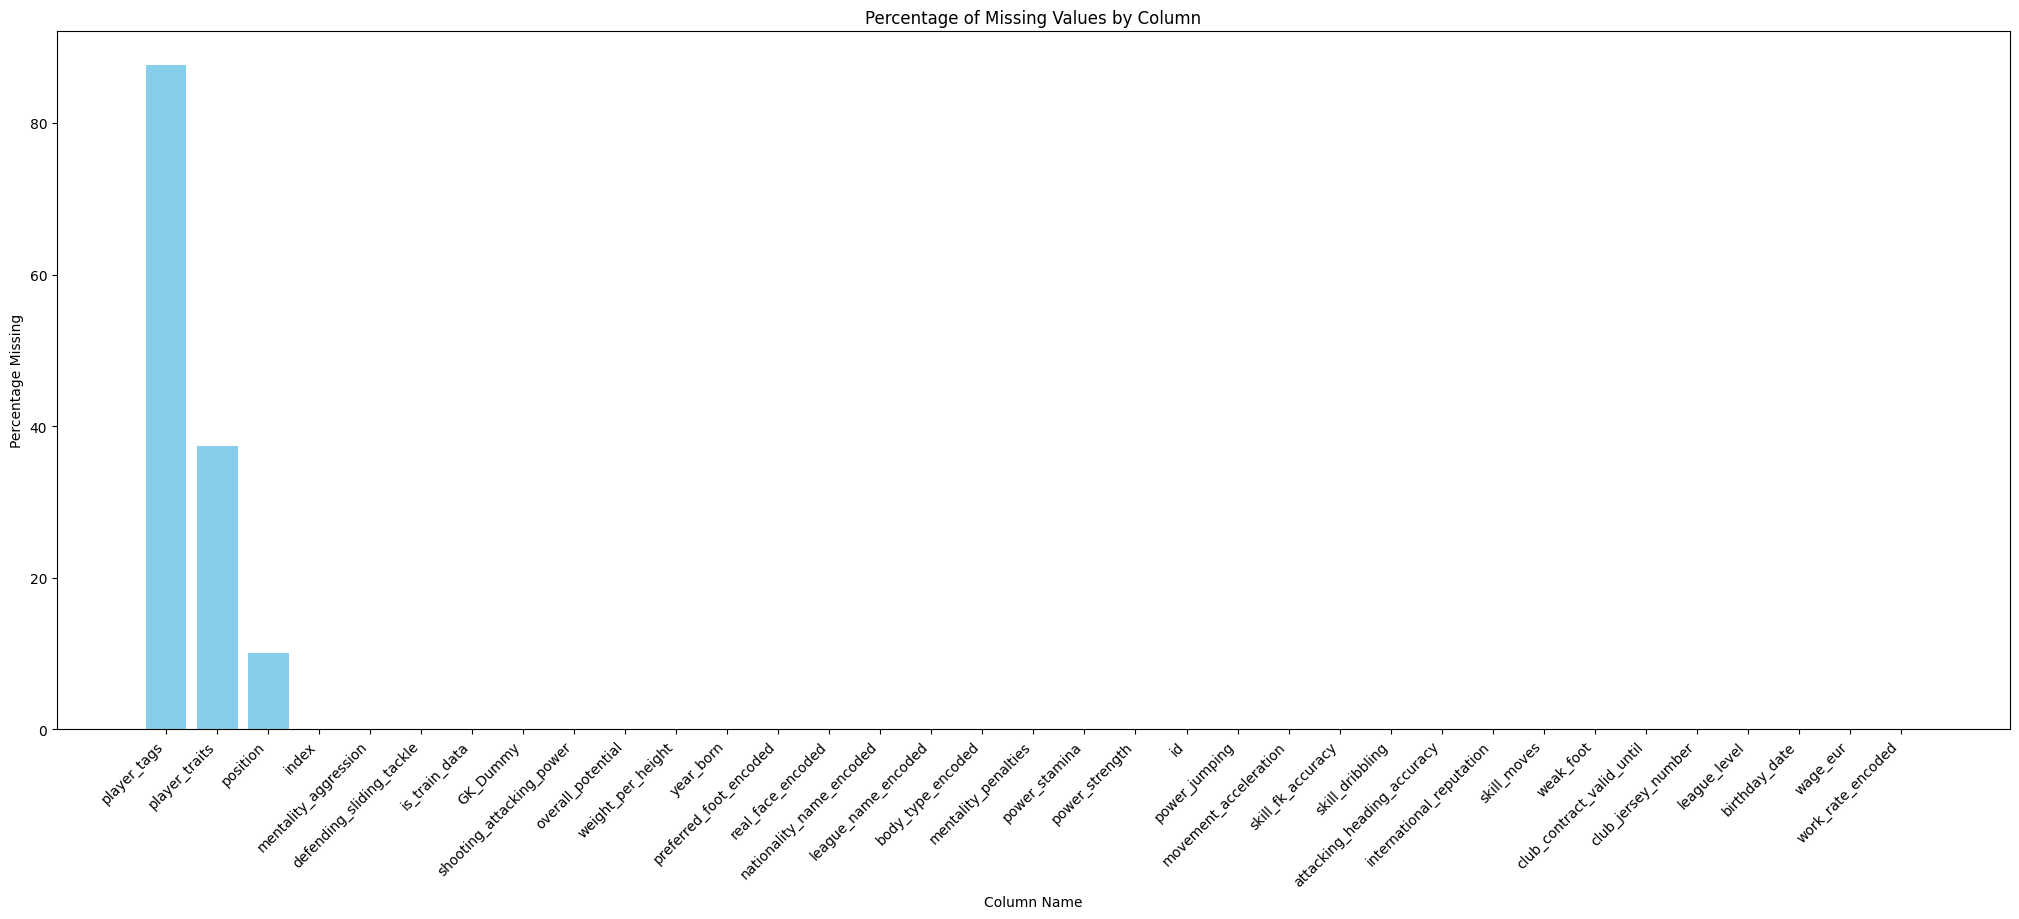


Columns with Missing Values (Descending Order):
player_tags: 87.7% (Categorical)
player_traits: 37.37% (Categorical)
position: 10.01% (Categorical)


In [ ]:
calculate_missing_info_print_only(df_without_gk)


In [ ]:
# eliminating all variables that don't make sense based on knowledge
# columns_to_drop = ['league_level', 'club_jersey_number', 'club_contract_valid_until', 'international_reputation', 'nationality_name_encoded', 'league_name_encoded']	

# # Drop the specified columns
# df_without_gk.drop(columns=columns_to_drop, inplace=True)

don't know yet how to deal with player_tags and player_traits..... Ignore them first

In [ ]:
def list_numerical_columns_horizontally_with_quotes(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    numerical_columns_with_quotes = ', '.join([f'"{col}"' for col in numerical_columns])
    return numerical_columns_with_quotes

list_numerical_columns_horizontally_with_quotes(df_without_gk)

'"index", "id", "wage_eur", "weak_foot", "skill_moves", "attacking_heading_accuracy", "skill_dribbling", "skill_fk_accuracy", "movement_acceleration", "power_jumping", "power_stamina", "power_strength", "mentality_aggression", "mentality_penalties", "defending_sliding_tackle", "is_train_data", "GK_Dummy", "shooting_attacking_power", "overall_potential", "weight_per_height", "preferred_foot_encoded", "real_face_encoded", "body_type_encoded", "work_rate_encoded"'

### Separating the dfs for training and testing

In [ ]:
"""From the numerical I will drop id, club_jersey_number and club_contract_valid_until"""
# Seperating test and train
X_train = df_without_gk[df_without_gk['is_train_data'] == 1][['league_level', 'club_jersey_number', 'club_contract_valid_until', 'international_reputation', 'nationality_name_encoded', 'league_name_encoded', "wage_eur", "weak_foot", "skill_moves", "attacking_heading_accuracy", "skill_dribbling", "skill_fk_accuracy", "movement_acceleration", "power_jumping", "power_stamina", "power_strength", "mentality_aggression", "mentality_penalties", "defending_sliding_tackle", "shooting_attacking_power", "overall_potential", "weight_per_height", "preferred_foot_encoded", "real_face_encoded", "body_type_encoded", "work_rate_encoded"]]
y_train = df_without_gk[df_without_gk['is_train_data'] == 1][['position']]

X_test = df_without_gk[df_without_gk['is_train_data'] == 0][['league_level', 'club_jersey_number', 'club_contract_valid_until', 'international_reputation', 'nationality_name_encoded', 'league_name_encoded', "wage_eur", "weak_foot", "skill_moves", "attacking_heading_accuracy", "skill_dribbling", "skill_fk_accuracy", "movement_acceleration", "power_jumping", "power_stamina", "power_strength", "mentality_aggression", "mentality_penalties", "defending_sliding_tackle", "shooting_attacking_power", "overall_potential", "weight_per_height", "preferred_foot_encoded", "real_face_encoded", "body_type_encoded", "work_rate_encoded"]]

# **Classification - Prediction**

In [ ]:
# Training the Random Forest Classifier
model = RandomForestClassifier(random_state=123)
model.fit(X_train, y_train)

# Making predictions for test_dataset
y_test_predicted = model.predict(X_test)

# Filling in the missing 'position' values in test_dataset
pred_df = pd.DataFrame()
pred_df['id'] = df_without_gk[df_without_gk['train_dummy'] == 0]['id']
pred_df['pred'] = y_test_predicted



In [ ]:
###TESTING THE Gradient boosting classifier to verify the score on kaggle###

#Gb = GradientBoostingClassifier(random_state=123, n_estimators=100, learning_rate=0.1, max_depth=3, max_features='sqrt')
# Training the Random Forest Classifier
model = GradientBoostingClassifier(random_state=123, n_estimators=110, learning_rate=0.1, max_depth=3, max_features='sqrt')    #n_estimators = number of trees

model.fit(X_train, y_train)

# Making predictions for test_dataset
y_test_predicted = model.predict(X_test)

# Filling in the missing 'position' values in test_dataset
pred_df = pd.DataFrame()
pred_df['id'] = df_without_gk[df_without_gk['train_dummy'] == 0]['id']
pred_df['pred'] = y_test_predicted

# Cross Validation

### Cross Validation for **Random Forest**

Find the best hyperparameter (around 30 mins to run)

In [ ]:
Rf = RandomForestClassifier(random_state=123)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],   # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at leaf nodes
    'max_features': ['sqrt', 'log2']  # Number of features to consider for split
}

# Perform GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=Rf, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Latest F1 score:

KeyboardInterrupt: 

In [ ]:
# Creating the Random Forest Classifier model
Rf = RandomForestClassifier(random_state=123, n_estimators=110, max_depth= None ,min_samples_split=10, min_samples_leaf=4 ,max_features='sqrt', bootstrap=True)

# Calculating the accuracy, precision, recall, and F1-score for each fold
#Rf_accuracy_scores = cross_val_score(Rf, X_train, y_train, cv=5, scoring='accuracy')
#Rf_precision_scores = cross_val_score(Rf, X_train, y_train, cv=5, scoring='precision_macro')
#Rf_recall_scores = cross_val_score(Rf, X_train, y_train, cv=5, scoring='recall_macro')
Rf_f1_scores = cross_val_score(Rf, X_train, y_train, cv=5, scoring='f1_macro')

# Printing the mean and standard deviation of each metric
#print("Mean accuracy score:", Rf_accuracy_scores.mean())
#print("Mean precision score:", Rf_precision_scores.mean())
#print("Mean recall score:", Rf_recall_scores.mean())
print("Mean F1 score:", Rf_f1_scores.mean())
#print("Standard deviation of F1 score:", Rf_f1_scores.std())



Mean F1 score: 0.18317331780119958


### Cross Validation for **Gradient Boosting Classifier**

Find the best hyperparameter for GBC (around 4 hours to run)

In [ ]:
gb = GradientBoostingClassifier(random_state=123)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],   # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at leaf nodes
    'max_features': ['sqrt', 'log2']  # Number of features to consider for split
}

# Perform GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)



KeyboardInterrupt: 

In [ ]:
# Creating the Gradient Boosting Classifier model
Gb = GradientBoostingClassifier(random_state=123, n_estimators=110, learning_rate=0.1, max_depth=3, max_features='sqrt')    #n_estimators = number of trees
    #learning_rate = how much each tree is allowed to correct the mistakes of the previous trees
    #max_depth = how many splits each tree is allowed to make
    
# Calculating the accuracy, precision, recall, and F1-score for each fold
#Gb_accuracy_scores = cross_val_score(Gb, X_train, y_train, cv=5, scoring='accuracy')
#Gb_precision_scores = cross_val_score(Gb, X_train, y_train, cv=5, scoring='precision_macro')
#Gb_recall_scores = cross_val_score(Gb, X_train, y_train, cv=5, scoring='recall_macro')
Gb_f1_scores = cross_val_score(Gb, X_train, y_train, cv=5, scoring='f1_macro')

# Printing the mean and standard deviation of each metric
#print("Mean accuracy score:", Gb_accuracy_scores.mean())
#print("Mean precision score:", Gb_precision_scores.mean())
#print("Mean recall score:", Gb_recall_scores.mean())
print("Mean F1 score:", Gb_f1_scores.mean())
#print("Standard deviation of F1 score:", Gb_f1_scores.std())

# Latest F1 score: 0.21756532303012385

Mean F1 score: 0.20309812452531323


### Cross Validation for **Logistic Regression**

In [ ]:
# Creating the Logistic Regression model
Lr = LogisticRegression(random_state=123)

# Calculating the accuracy, precision, recall, and F1-score for each fold
#Lr_accuracy_scores = cross_val_score(Lr, X_train, y_train, cv=5, scoring='accuracy')
#Lr_precision_scores = cross_val_score(Lr, X_train, y_train, cv=5, scoring='precision_macro')
#Lr_recall_scores = cross_val_score(Lr, X_train, y_train, cv=5, scoring='recall_macro')
Lr_f1_scores = cross_val_score(Lr, X_train, y_train, cv=5, scoring='f1_macro')

# Printing the mean and standard deviation of each metric
#print("Mean accuracy score:", Lr_accuracy_scores.mean())
#print("Mean precision score:", Lr_precision_scores.mean())
#print("Mean recall score:", Lr_recall_scores.mean())
print("Mean F1 score:", Lr_f1_scores.mean())
#print("Standard deviation of F1 score:", Lr_f1_scores.std())

Mean F1 score: 0.026578736773099798


### Cross Validation for **Decision Tree Classifier**

Find the best hyperparameter for GBC (around 4 hours to run)

In [ ]:
gb = DecisionTreeClassifier(random_state=123)

# Define the grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],      # Splitting criterion
    'max_depth': [None, 5, 10, 15],        # Maximum depth of trees
    'min_samples_split': [2, 5, 10, 15],   # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4, 6],      # Minimum samples required at leaf nodes
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider for split
    'splitter': ['best', 'random']         # Strategy to choose the split at each node
}

# Perform GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 15, 'splitter': 'best'}


In [ ]:
# Creating the Decision Tree model
Dt = DecisionTreeClassifier(random_state=123, criterion = "entropy", max_depth=None, min_samples_split=15, min_samples_leaf=4, max_features=None, splitter='best')
    # max_depth = hyperparameter that defines the maximum depth of the decision tree. (maximum number of levels that the tree can grow to during training.)
    # min_samples_split = hyperparameter that sets the minimum number of samples required to split an internal node. (node will only be split further if it contains at least 2 samples.)

# Calculating the accuracy, precision, recall, and F1-score for each fold
#Dt_accuracy_scores = cross_val_score(Dt, X_train, y_train, cv=5, scoring='accuracy')
#Dt_precision_scores = cross_val_score(Dt, X_train, y_train, cv=5, scoring='precision_macro')
#Dt_recall_scores = cross_val_score(Dt, X_train, y_train, cv=5, scoring='recall_macro')
Dt_f1_scores = cross_val_score(Dt, X_train, y_train, cv=5, scoring='f1_macro')

# Printing the mean and standard deviation of each metric
#print("Mean accuracy score:", Lr_accuracy_scores.mean())
#print("Mean precision score:", Lr_precision_scores.mean())
#print("Mean recall score:", Lr_recall_scores.mean())
print("Mean F1 score:", Dt_f1_scores.mean())
#print("Standard deviation of F1 score:", Lr_f1_scores.std())

#Latest F1 score: 0.19965866994086084

Mean F1 score: 0.1864220204390363


### Cross Validation for **Light GBM**

In [ ]:
# Creating the Logistic Regression model
Lgbm = lgb.LGBMClassifier(n_estimators=100, random_state=123)

# Calculating the accuracy, precision, recall, and F1-score for each fold
#Lr_accuracy_scores = cross_val_score(Lr, X_train, y_train, cv=5, scoring='accuracy')
#Lr_precision_scores = cross_val_score(Lr, X_train, y_train, cv=5, scoring='precision_macro')
#Lr_recall_scores = cross_val_score(Lr, X_train, y_train, cv=5, scoring='recall_macro')
Lr_f1_scores = cross_val_score(Lgbm, X_train, y_train, cv=5, scoring='f1_macro')

# Printing the mean and standard deviation of each metric
#print("Mean accuracy score:", Lr_accuracy_scores.mean())
#print("Mean precision score:", Lr_precision_scores.mean())
#print("Mean recall score:", Lr_recall_scores.mean())
print("Mean F1 score:", Lr_f1_scores.mean())
#print("Standard deviation of F1 score:", Lr_f1_scores.std())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1132
[LightGBM] [Info] Number of data points in the train set: 5011, number of used features: 20
[LightGBM] [Info] Start training from score -3.172283
[LightGBM] [Info] Start training from score -3.629042
[LightGBM] [Info] Start training from score -3.731899
[LightGBM] [Info] Start training from score -4.425046
[LightGBM] [Info] Start training from score -2.605888
[LightGBM] [Info] Start training from score -2.294832
[LightGBM] [Info] Start training from score -2.696345
[LightGBM] [Info] Start training from score -3.437986
[LightGBM] [Info] Start training from score -5.261294
[LightGBM] [Info] Start training from score -2.832415
[LightGBM] [Info] Start training from score -3.437986
[LightGBM] [Info] Start training from score -3.629042
[LightGBM] [Info] Start training from score -4.088574
[LightGBM]

prediction with lightgbm

In [ ]:
# Training the Gradient Boosting Classifier
model = lgb.LGBMClassifier(n_estimators=100, random_state=123)
model.fit(X_train, y_train)

# Making predictions for test_dataset
y_test_predicted = model.predict(X_test)

# Filling in the missing 'position' values in test_dataset
pred_df = pd.DataFrame()
pred_df['id'] = df_without_gk[df_without_gk['train_dummy'] == 0]['id']
pred_df['pred'] = y_test_predicted

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002918 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2052
[LightGBM] [Info] Number of data points in the train set: 6264, number of used features: 33
[LightGBM] [Info] Start training from score -3.170420
[LightGBM] [Info] Start training from score -3.624580
[LightGBM] [Info] Start training from score -3.725294
[LightGBM] [Info] Start training from score -4.425086
[LightGBM] [Info] Start training from score -2.604847
[LightGBM] [Info] Start training from score -2.295268
[LightGBM] [Info] Start training from score -2.695202
[LightGBM] [Info] Start training from score -3.439269
[LightGBM] [Info] Start training from score -5.276838
[LightGBM] [Info] Start training from score -2.831778
[LightGBM] [Info] Start training from score -3.439269
[LightGBM] [Info] Start training from score -3.630586
[LightGBM] [Info] Start training from score -4.098183
[LightGBM]

prediction with gradient boosting

In [ ]:
# Training the Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=123)
model.fit(X_train, y_train)

# Making predictions for test_dataset
y_test_predicted = model.predict(X_test)

# Filling in the missing 'position' values in test_dataset
pred_df = pd.DataFrame()
pred_df['id'] = df_without_gk[df_without_gk['is_train_data'] == 0]['id']
pred_df['pred'] = y_test_predicted

In [ ]:
pred_df


,id,pred
26,115909,ST
35,135537,RCB
44,140222,RCB
47,142499,RCM
59,145014,RCM
...,...,...
7620,263288,RW
7621,263291,RB
7635,263550,LCB
7645,263808,LM


Now we have the predictions for the non-goalkeepers. So, we have to add the ids of the goalkeepers with the prediction 'GK'

In [ ]:
merged_df = pd.merge(pred_df, df_test, on='id', how='outer')

In [ ]:
merged_df['pred'] = merged_df['pred'].fillna('GK')

In [ ]:
merged_df

,id,pred,short_name,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,is_train_data
0,115909,ST,Rubén Castro,69,69,NaN,3000,1981-06-27,169,68,...,36,12,14,14,8,15,8,12,NaN,0
1,135537,RCB,G. Tamaș,67,67,180000,2000,1983-11-09,188,85,...,68,66,65,12,8,13,7,7,NaN,0
2,140222,RCB,P. Da Silva,67,67,NaN,500,1980-02-01,180,76,...,70,67,64,9,8,15,16,9,NaN,0
3,142499,RCM,Aitor Sanz,70,70,325000,4000,1984-09-13,181,71,...,69,64,60,14,11,12,9,16,NaN,0
4,145014,RCM,Juande,67,67,350000,2000,1986-08-12,185,74,...,65,64,62,13,5,12,12,14,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,233154,GK,S. Takagi,66,66,425000,1000,1989-05-22,181,76,...,10,10,12,64,65,70,66,68,50,0
763,210257,GK,Ederson,89,91,94000000,200000,1993-08-17,188,86,...,29,15,8,87,82,93,88,88,64,0
764,208719,GK,P. Kühn,70,70,1100000,3000,1992-09-02,188,95,...,8,17,16,70,63,69,72,74,50,0
765,223175,GK,O. Kocuk,69,72,1400000,16000,1995-07-27,188,78,...,5,10,11,71,68,62,64,73,33,0


In [ ]:
selected_columns = ['id', 'pred']
new_test_dataset = merged_df[selected_columns]

#export_data_path = 'C:/Users/vanes/Desktop/BSE/Term 1/Computational Machine Learning/Project_2/try_Vanessa.csv'
export_data_path = '/Users/vanes/Desktop/Prediction_removing_more_features.csv'
new_test_dataset.to_csv(export_data_path, index=False)



## Things that didn't improve the score

In [ ]:
def winsorize_columns(df, columns, limits=(0.05, 0.05)):
    """
    Winsorize specified columns in a DataFrame by replacing extreme values with less extreme values.

    Parameters:
    - df: DataFrame, the dataset to be winsorized.
    - columns: list of str, the names of columns to be winsorized.
    - limits: tuple of two floats (lower, upper), representing the fraction of values to be replaced
              on each tail. Default is (0.05, 0.05), which replaces 5% of the values on each tail.

    Returns:
    - winsorized_df: DataFrame, the winsorized dataset.
    """
    # Copy the input DataFrame to avoid modifying the original DataFrame
    winsorized_df = df.copy()

    for column in columns:
        # Calculating the lower and upper limits for winsorization
        lower_limit = np.percentile(winsorized_df[column], limits[0] * 100)
        upper_limit = np.percentile(winsorized_df[column], 100 - limits[1] * 100)

        # Replacing values below the lower limit with the lower limit
        winsorized_df[column] = np.where(winsorized_df[column] < lower_limit, lower_limit, winsorized_df[column])

        # Replacing values above the upper limit with the upper limit
        winsorized_df[column] = np.where(winsorized_df[column] > upper_limit, upper_limit, winsorized_df[column])

    return winsorized_df

In [ ]:
df_without_gk = winsorize_columns(df_without_gk, ['overall_potential', 'league_level', 'club_jersey_number', 'club_contract_valid_until', 'weak_foot', 'skill_moves', 'international_reputation', 'attacking_heading_accuracy', 'skill_dribbling', 'skill_fk_accuracy', 'movement_acceleration', 'power_jumping', 'power_stamina', 'power_strength', 'mentality_aggression', 'mentality_penalties', 'defending_sliding_tackle', 'is_train_data', 'GK_Dummy', 'shooting_attacking_power', 'weight_per_height'])